# Proyecto 03 - Series de Tiempo

__Alumno:__ Rafael E. Aguilar

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
# Para iniciar la exploración de datos se importan las librerías requeridas para tener acceso a las funciones que permitan el procedimiento
# IMPORTANDO LIBRERÍAS

#Analisis de Datos
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime

#Desactivacion de warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action= "ignore", category= FutureWarning )

#Representacion gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

%load_ext autotime

time: 0 ns (started: 2021-07-15 02:21:27 -03:00)


In [3]:
# Cargamos los 3 datasets del proyecto
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
print("Datos cargados satisfactoriamente")

Datos cargados satisfactoriamente
time: 3.19 s (started: 2021-07-15 02:21:27 -03:00)


In [4]:
# Consultamos las dimensiones de los datasets
print('Cantidad de Filas y columnas del dataset data_2017=',data_2017.shape)
print('Cantidad de Filas y columnas del dataset data_2018=',data_2018.shape)
print('Cantidad de Filas y columnas del dataset data_2019=',data_2019.shape)

Cantidad de Filas y columnas del dataset data_2017= (1372645, 10)
Cantidad de Filas y columnas del dataset data_2018= (1375908, 10)
Cantidad de Filas y columnas del dataset data_2019= (812153, 10)
time: 0 ns (started: 2021-07-15 02:21:30 -03:00)


In [5]:
# Consultamos la composición de los datasets: 2019
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


time: 266 ms (started: 2021-07-15 02:21:30 -03:00)


In [6]:
# Consultamos la composición de los datasets: 2018
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


time: 312 ms (started: 2021-07-15 02:21:31 -03:00)


In [7]:
# Consultamos la composición de los datasets: 2017
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


time: 281 ms (started: 2021-07-15 02:21:31 -03:00)


In [8]:
valoresFaltantes_count2017 = data_2017.isnull().sum()
print(valoresFaltantes_count2017[0:2000000])

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64
time: 281 ms (started: 2021-07-15 02:21:31 -03:00)


## Pregunta: Cuáles son las formas de pago más utilizadas en cada año?

In [9]:
# ¿Formas de pago mas utilizadas del 2017?
data_2017.forma_pago.value_counts()

EFECTIVO                447203
TELEPASE                397420
EXENTO                  169889
INFRACCION              140275
NO COBRADO              117730
TARJETA DISCAPACIDAD    100106
MONEDERO                    14
Otros                        8
Name: forma_pago, dtype: int64

time: 78 ms (started: 2021-07-15 02:21:31 -03:00)


In [10]:
# ¿Formas de pago mas utilizadas del 2018?
data_2018.forma_pago.value_counts()

TELEPASE                429053
EFECTIVO                423633
EXENTO                  162103
INFRACCION              153331
NO COBRADO              121440
TARJETA DISCAPACIDAD     86348
Name: forma_pago, dtype: int64

time: 63 ms (started: 2021-07-15 02:21:31 -03:00)


In [11]:
# ¿Formas de pago mas utilizadas del 2019?
data_2019.forma_pago.value_counts()

TELEPASE           201388
EFECTIVO           149340
NO COBRADO         141280
EXENTO             132716
INFRACCION         111428
T. DISCAPACIDAD     76001
Name: forma_pago, dtype: int64

time: 47 ms (started: 2021-07-15 02:21:32 -03:00)


### Las formas de pago más utilizadas cada años según los sets de datos disponibres son:


-  Año 2017: las formas de pago más usadas fueron __EFECTIVO y TELEPASE__
-  Año 2018: las formas de pago más usadas fueron __TELEPASE y EFECTIVO__
-  Año 2019: las formas de pago más usadas fueron __TELEPASE y EFECTIVO__

___

## 2.- Exploramos sobre el contenido y significado de las columnas de los datasets:

In [12]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
time: 156 ms (started: 2021-07-15 02:21:32 -03:00)


In [13]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
time: 156 ms (started: 2021-07-15 02:21:32 -03:00)


In [14]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
time: 157 ms (started: 2021-07-15 02:21:32 -03:00)


In [15]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
time: 157 ms (started: 2021-07-15 02:21:32 -03:00)


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

___

## 3.- Delimitamos los datos al alcance establecido en la consigna

- __Alcance:__ Estación de peaje Illia, sólamente los pagos realizados en efectivo.

In [16]:
# Unimos los 3 datasets
dataset = pd.concat([data_2019, data_2018, data_2017])

# Seleccionamos los registros de la estación Illia y cuya forma de pago fue el Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

# Descartamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


time: 1.2 s (started: 2021-07-15 02:21:32 -03:00)


In [17]:
# Convertimos la columna fecha a formato datetime, y le agregamos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

# Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


time: 47 ms (started: 2021-07-15 02:21:34 -03:00)


In [18]:
# Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


time: 16 ms (started: 2021-07-15 02:21:34 -03:00)


In [19]:
# Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


time: 15 ms (started: 2021-07-15 02:21:34 -03:00)


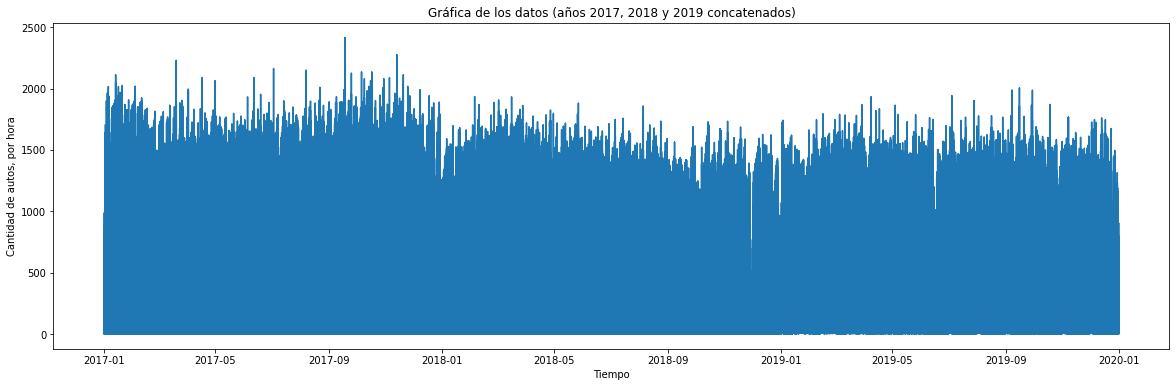

time: 1.67 s (started: 2021-07-15 02:21:34 -03:00)


In [20]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (20,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.title('Gráfica de los datos (años 2017, 2018 y 2019 concatenados)')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

__Gráfica 1.-__ muestra por primera vez los datos del proyecto.

In [21]:
# Resampleamos nuestros datos agrupándolos por dia, y mejorar un poco la visualización
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


time: 79 ms (started: 2021-07-15 02:21:35 -03:00)


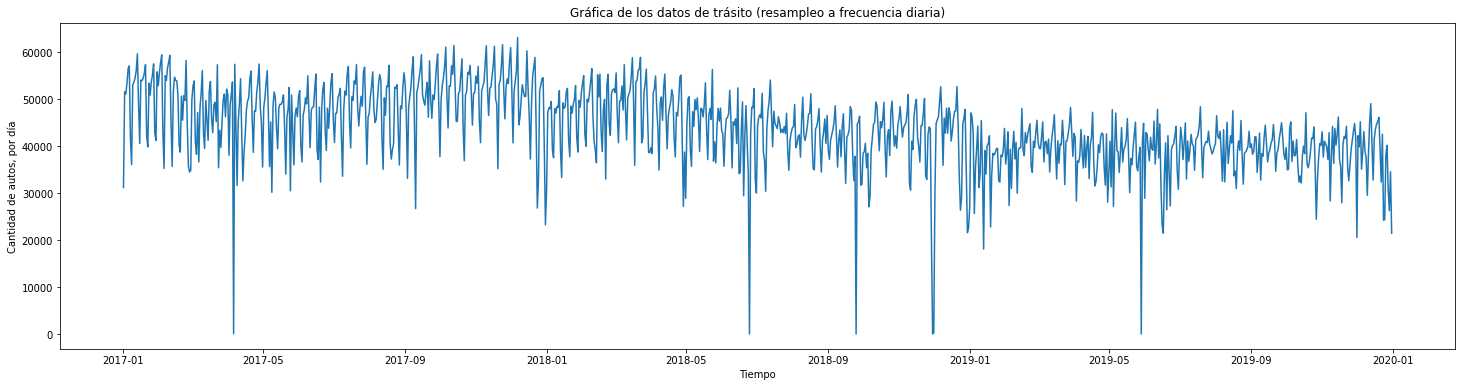

time: 188 ms (started: 2021-07-15 02:21:35 -03:00)


In [22]:
# Graficamos los datos "resampleados" a una frecuencia diaria
plt.figure(figsize = (25,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title('Gráfica de los datos de trásito (resampleo a frecuencia diaria)')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por día')
plt.show()

__Gráfica 2.-__ muestra los datos en una frecuencia diaria.

___

# Análisis Exploratorio de Datos

## 4.- Analizamos la completitud y distribución de los datos 
- Analizamos los valores faltantes
- Analizamos las distribuciones haciendo "drill down" en las variables categóricas
- Analizamos la distribución de valores atípicos

In [180]:
# Examinamos la posible existencia de valores faltantes en el dataset
print('Valores null=',diario.isnull().sum())
print('Valores na=',diario.isna().sum())

Valores null= cantidad_pasos    0
dtype: int64
Valores na= cantidad_pasos    0
dtype: int64
time: 453 ms (started: 2021-07-19 23:05:10 -03:00)


<AxesSubplot:title={'center':'Gráfico de cantidad de pasos por día de la semana'}, xlabel='dia', ylabel='count'>

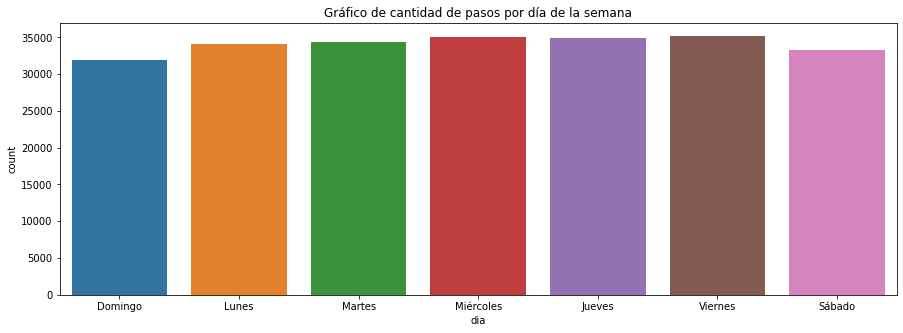

time: 203 ms (started: 2021-07-15 02:21:36 -03:00)


In [24]:
# Graficamos las cantidades de pasos vehiculares por día de la semana
plt.figure(figsize = (15,5))
plt.title("Gráfico de cantidad de pasos por día de la semana")
sns.countplot(data= dataset,x = "dia")

__Gráfica 3.-__ muestra la totalidad de pasos de los años 2017, 2018 y 2019, discriminados por día de la semana.


<AxesSubplot:title={'center':'Gráfico de cantidad de pasos por día de la semana'}, xlabel='dia'>

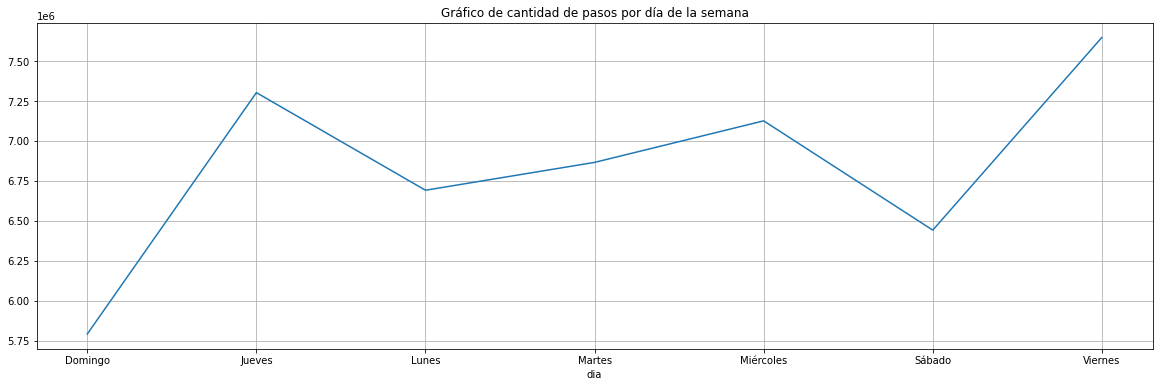

time: 890 ms (started: 2021-07-15 02:21:36 -03:00)


In [25]:
# Graficamos los totales diarios en el total de pasos, durante cada semana
dataset_diario = dataset.groupby(by=["dia"]).sum()
dataset_diario2= dataset_diario.sort_values('dia')
plt.title("Gráfico de cantidad de pasos por día de la semana")
dataset_diario2.cantidad_pasos.plot(grid=True, figsize=(20,6), )

__Gráfica 4.-__


In [26]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


time: 31 ms (started: 2021-07-15 02:21:37 -03:00)


In [27]:
data_completa = diario.copy()
data_completa.interpolate(inplace=True)
#data_completa.index = data_completa["fecha"]
data_completa

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


time: 16 ms (started: 2021-07-15 02:21:37 -03:00)


## 5.- Visualización de valores atípicos

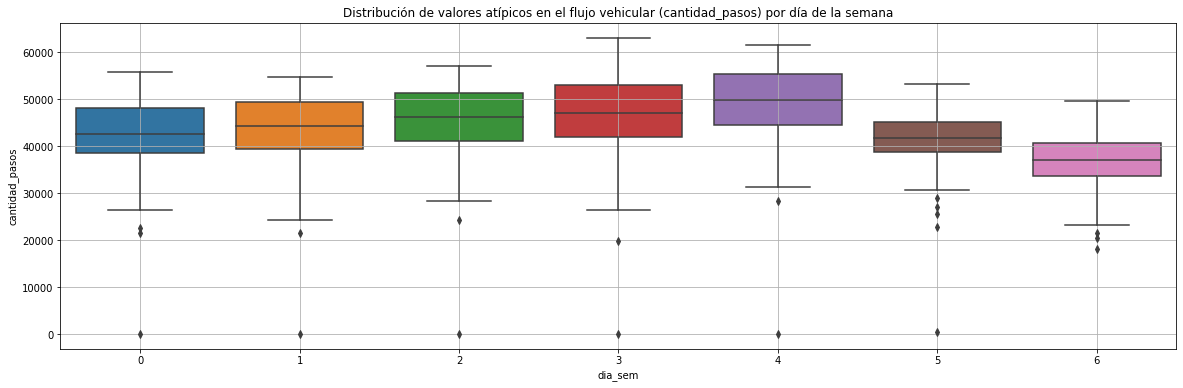

time: 235 ms (started: 2021-07-15 02:21:37 -03:00)


In [29]:
# Visualizando la distribucion de los valores atípicos por día de la semana
plt.figure(figsize=(20,6))


grouped_ent = data_completa.loc[:,['dia_sem', 'cantidad_pasos']] \
    .groupby(['dia_sem']) \
    .median() \
    .sort_values(by='dia_sem', ascending= True)

plt.title('Distribución de valores atípicos en el flujo vehicular (cantidad_pasos) por día de la semana')
ax= sns.boxplot( data= data_completa, x='dia_sem' , y='cantidad_pasos', order=grouped_ent.index)
#ax.set_yscale('log')

plt.setp(ax.get_xticklabels(), rotation=0)
plt.grid()
plt.show()

__Gráfica 5.-__ muestra la distribución de valores atípicos en una base de comparación diaria. Todos los días a excepción del día 6 (sábado) tienen valores excepcionalmente bajos (outliers).

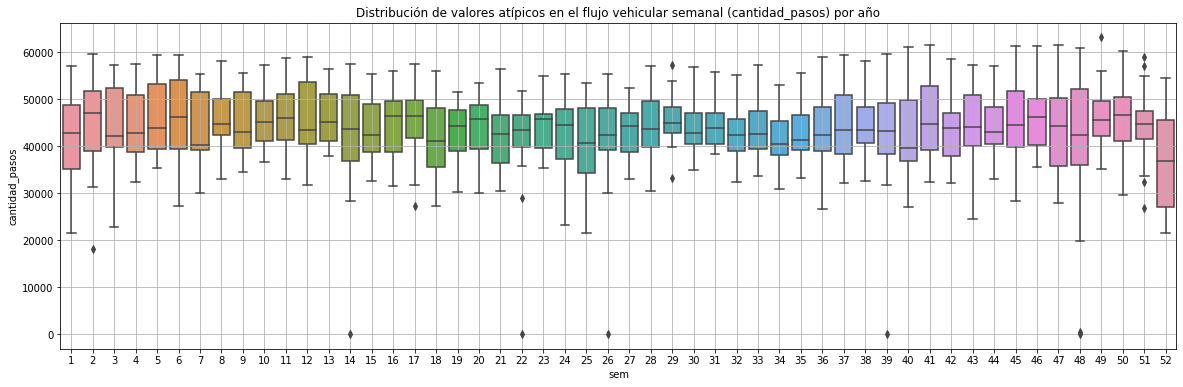

time: 1.02 s (started: 2021-07-15 02:21:37 -03:00)


In [30]:
# Visualizando la distribucion de los valores de la cantidad de pasos en base semanal
plt.figure(figsize=(20,6))

grouped4 = data_completa.loc[:,['sem', 'cantidad_pasos']] \
    .groupby(['sem']) \
    .median() \
    .sort_values(by='sem', ascending= True)

plt.title('Distribución de valores atípicos en el flujo vehicular semanal (cantidad_pasos) por año')
#fig.suptitle('Distribución de el precio de las propiedades (filtradas)')
ax= sns.boxplot( data= data_completa, x='sem' , y='cantidad_pasos', order= grouped4.index)
#ax.set_yscale('log')

plt.setp(ax.get_xticklabels(), rotation=0)
plt.grid()
plt.show()

__Gráfica 6.-__ muestra que resaltan los valores atípicos 0 (cero) flujo vehícular en algunas semanas.

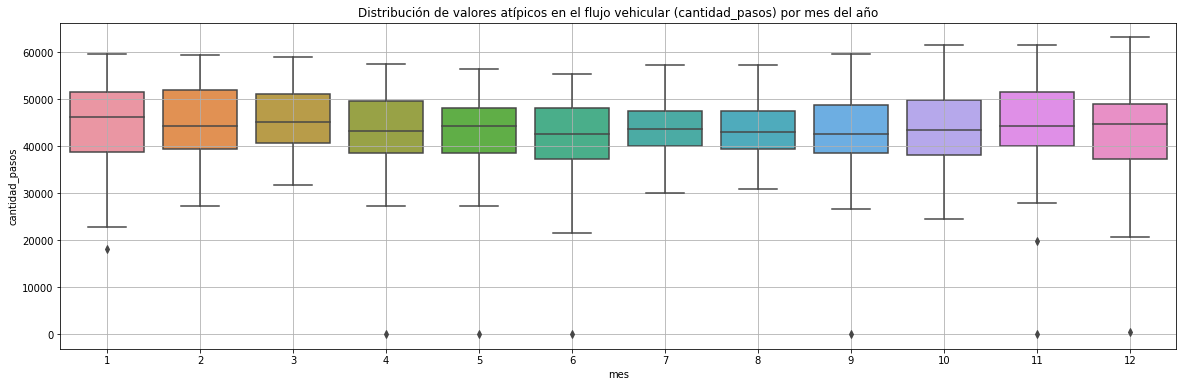

time: 250 ms (started: 2021-07-15 02:21:38 -03:00)


In [31]:
# Visualizando la distribucion de los valores de la cantidad de pasos en base mensual
plt.figure(figsize=(20,6))

grouped2 = data_completa.loc[:,['mes', 'cantidad_pasos']] \
    .groupby(['mes']) \
    .median() \
    .sort_values(by='mes', ascending= True)

plt.title('Distribución de valores atípicos en el flujo vehicular (cantidad_pasos) por mes del año')
ax= sns.boxplot( data= data_completa, x='mes' , y='cantidad_pasos', order=grouped2.index)
#ax.set_yscale('log')

plt.setp(ax.get_xticklabels(), rotation=0)
plt.grid()
plt.show()

__Gráfica 7.-__ muestra que a medida que se aumenta la agrupación temporal de días a semanas, y de semanas a meses, los outliers bajos se van incorporando al grueso de los valores representativos. Sin embargo, se revela que los valores cero, si bien pueden ser reales, son sucesos puntuales y aislados que no estan relacionados con la dinámica de comportamiento descrita por el resto de los datos.
___

### 6.- Análisis de componentes de las series

Por cada año se hará una agrupación a una frecuancia diaria, para graficar el comportamiento de las series en cada año individualmente:

In [32]:
data_completa

,cantidad_pasos,fechas,dia_sem,sem,mes,anio
fecha,,,,,,
2017-01-01,31183,2017-01-01,6,52,1,2017
2017-01-02,51568,2017-01-02,0,1,1,2017
2017-01-03,51093,2017-01-03,1,1,1,2017
2017-01-04,53332,2017-01-04,2,1,1,2017
2017-01-05,56486,2017-01-05,3,1,1,2017
...,...,...,...,...,...,...
2019-12-27,40182,2019-12-27,4,52,12,2019
2019-12-28,30681,2019-12-28,5,52,12,2019
2019-12-29,26259,2019-12-29,6,52,12,2019


time: 0 ns (started: 2021-07-15 02:21:38 -03:00)


In [33]:
# Separamos los datasets originales
dataset_2017 = data_completa[data_completa.anio == 2017]
dataset_2018 = data_completa[data_completa.anio == 2018]
dataset_2019 = data_completa[data_completa.anio == 2019]

time: 0 ns (started: 2021-07-15 02:21:39 -03:00)


In [193]:
# Obtenemos la media móvil
diario_2017 = dataset_2017.resample("D", on="fechas").sum()
diario_2017["mean_2017"] = diario_2017.cantidad_pasos.rolling(12).mean().dropna() #Longitud de ventana, media y eliminamos nan.
diario_2017["fecha_greg"] = diario_2017.index.map(datetime.datetime.toordinal) #index.map=signar valores mediante la correspondencia de entrada, 
                                                                               #.datetime.toordinal=Retorna el ordinal gregorianoproléptico de la fecha

time: 16 ms (started: 2021-07-20 00:21:51 -03:00)


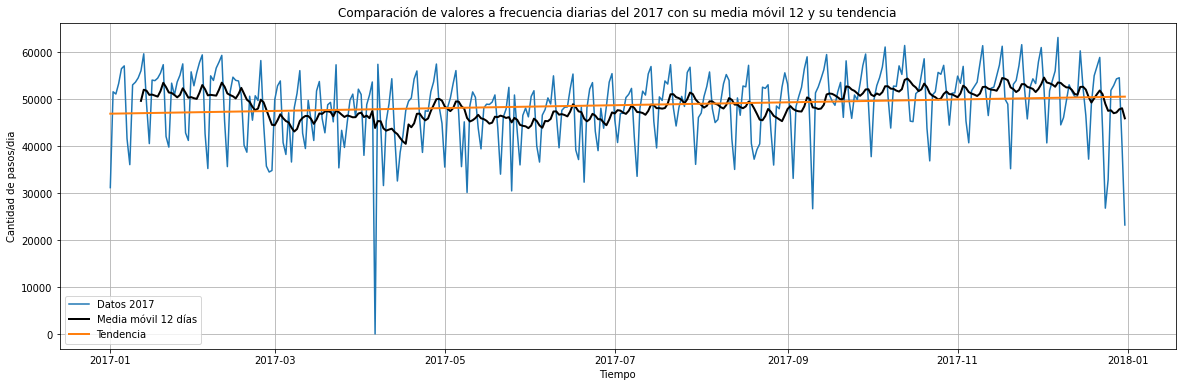

time: 234 ms (started: 2021-07-20 00:22:37 -03:00)


In [196]:
# Graficamos el año 2017 con tendencia y media movil.
from sklearn.linear_model import LinearRegression
lreg =  LinearRegression()
lreg.fit(diario_2017.fecha_greg.values.reshape(-1,1),diario_2017.cantidad_pasos)

plt.figure(figsize= (20,6))
plt.plot(diario_2017.index, diario_2017.cantidad_pasos)
plt.plot(diario_2017.mean_2017, c="k", ls ="solid",lw=2)
plt.plot(diario_2017.index,lreg.predict(diario_2017.fecha_greg.values.reshape(-1,1)) ,lw = 2, ls = "-")

plt.title('Comparación de valores a frecuencia diarias del 2017 con su media móvil 12 y su tendencia')
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de pasos/dia")
plt.legend(['Datos 2017', 'Media móvil 12 días', 'Tendencia'])
plt.setp(ax.get_xticklabels(), rotation=0)
plt.grid()
plt.show()

__Gráfica 8.-__ muestra un comportamiento cíclico en intervalos de 7 y 12 días. La tendencia de los valores de cantidad de pasos es creciente.

In [190]:
# 
diario_2018 = dataset_2018.resample("D", on="fechas").sum()
diario_2018["mean_2018"] = diario_2018.cantidad_pasos.rolling(12).mean().dropna() #Longitud de ventana, media y eliminamos nan.
diario_2018["fecha_greg"] = diario_2018.index.map(datetime.datetime.toordinal) #index.map=signar valores mediante la correspondencia de entrada, 
                                                                               #.datetime.toordinal=Retorna el ordinal gregorianoproléptico de la fecha


time: 0 ns (started: 2021-07-20 00:19:22 -03:00)


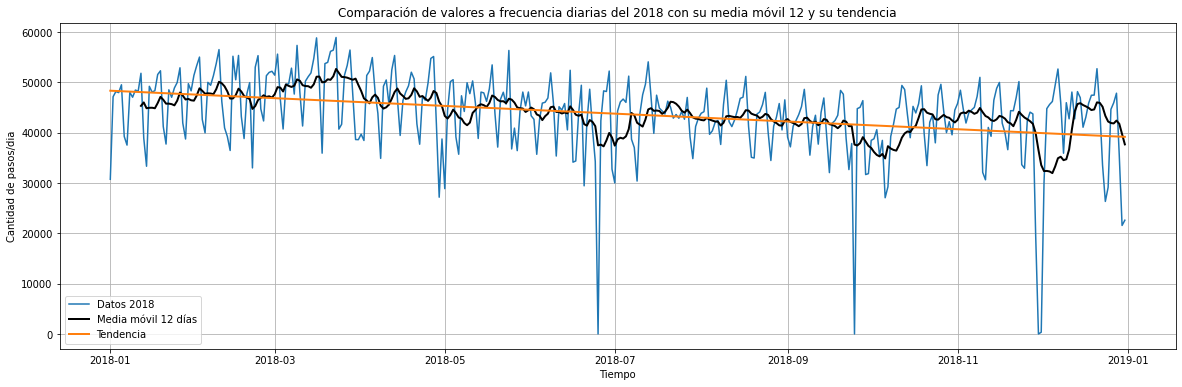

time: 219 ms (started: 2021-07-20 00:22:45 -03:00)


In [197]:
# Graficamos el año 2018 con tendencia y media movil.
lreg =  LinearRegression()
lreg.fit(diario_2018.fecha_greg.values.reshape(-1,1),diario_2018.cantidad_pasos)

plt.figure(figsize= (20,6))
plt.plot(diario_2018.index, diario_2018.cantidad_pasos)
plt.plot(diario_2018.mean_2018, c="k", ls ="solid",lw=2)
plt.plot(diario_2018.index,lreg.predict(diario_2018.fecha_greg.values.reshape(-1,1)) ,lw = 2, ls = "-")

plt.title('Comparación de valores a frecuencia diarias del 2018 con su media móvil 12 y su tendencia')
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de pasos/dia")
plt.legend(['Datos 2018', 'Media móvil 12 días', 'Tendencia'])
plt.setp(ax.get_xticklabels(), rotation=0)
plt.grid()
plt.show()

__Gráfica 9.-__ muestra un comportamiento cíclico en intervalos de 7 y más marcado en los 12 días comparado con el 2017. La tendencia de los valores de cantidad de pasos es decreciente. Al final del año se nota incremento en la amplitud de las fluctuaciones.

In [38]:
diario_2019 = dataset_2019.resample("D", on="fechas").sum()
diario_2019["mean_2019"] = diario_2019.cantidad_pasos.rolling(12).mean().dropna() #Longitud de ventana, media y eliminamos nan.
diario_2019["fecha_greg"] = diario_2019.index.map(datetime.datetime.toordinal) #index.map=signar valores mediante la correspondencia de entrada, 
                                                                               #.datetime.toordinal=Retorna el ordinal gregorianoproléptico de la fecha

time: 16 ms (started: 2021-07-15 02:21:49 -03:00)


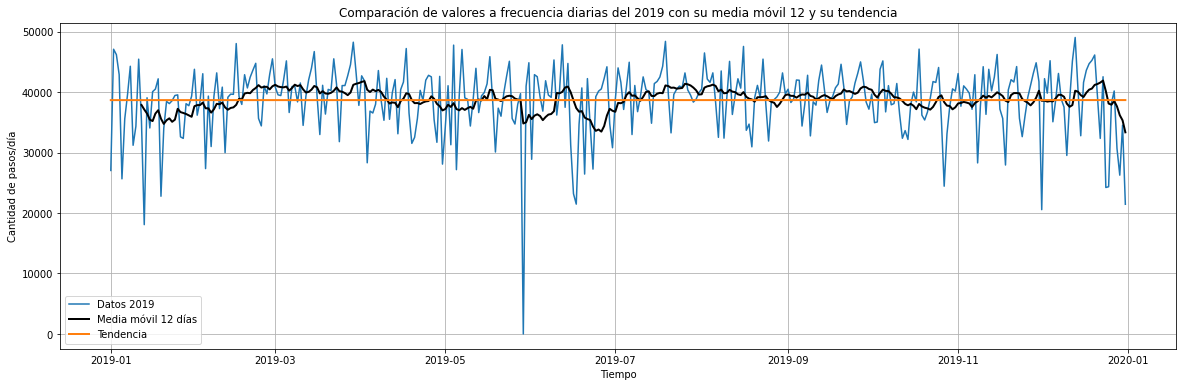

time: 265 ms (started: 2021-07-20 00:24:15 -03:00)


In [198]:
# Graficamos el año 2019 con tendencia y media movil.
lreg =  LinearRegression()
lreg.fit(diario_2019.fecha_greg.values.reshape(-1,1),diario_2019.cantidad_pasos)

plt.figure(figsize= (20,6))
plt.plot(diario_2019.index, diario_2019.cantidad_pasos)
plt.plot(diario_2019.mean_2019, c="k", ls ="solid",lw=2)
plt.plot(diario_2019.index,lreg.predict(diario_2019.fecha_greg.values.reshape(-1,1)) ,lw = 2, ls = "-")

plt.title('Comparación de valores a frecuencia diarias del 2019 con su media móvil 12 y su tendencia')
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de pasos/día")
plt.legend(['Datos 2019', 'Media móvil 12 días', 'Tendencia'])
plt.setp(ax.get_xticklabels(), rotation=0)
plt.grid()
plt.show()

__Gráfica 10.-__ a diferencia de los años anteriores 2017 y 2018, el comportamiento del año 2019 no muestra un patrón claro de ciclicidad estable a 7 ni a 12 días. La media móvil 12 se muestra errática. La tendencia de los valores es estable.

__Análisis:__

__Año 2017:__ mostró un comportamiento con claros patrones cíclicos en la curva diaria y móvil 12, la tendencia fue creciente. Este año presenta patrones ciclicos estables que podrían ser aprovechados para su modelado y posiblemente obtener buen desempeño en ensayos predictivos.

__Año 2018:__ mostró un comportamiento con claros patrones cíclicos en la curva diaria. En la media móvil 12 mostró un leve aumento de la amplitud de las fluctuaciones. Contrario al año 2017, la tendencia fue decreciente. 

__Año 2019:__ no se logra detectar un patrón claro de ciclicidad estable a 7 ni a 12 días. La media móvil 12 se muestra errática como reflejo de la ausencia de patrones ciclicos a nivel semanal. La tendencia de los valores es estable. A simple vista se podría pensar que no existen patrones claros de comportamiento en el año 2019 que faciliten el modelado con fines predictivos.
___

## 7.- Descomposición Temporal

Visualizamos la distribución de la ciclicidad y temporalidad en el comportamiento de las series de tiempo.

__Utilidad de analizar la Descomposición Temporal:__

La descomposición se utiliza principalmente para el análisis de series de tiempo y, como herramienta de análisis, se puede utilizar para informar a los modelos de pronóstico sobre su problema.

Es una herramienta de análisis que proporciona una forma estructurada de pensar acerca de un problema de predicción de series de tiempo, tanto en general en términos de complejidad de modelado como específicamente en términos de cómo capturar mejor cada uno de estos componentes en un modelo dado.

Se recomienda abordar cada uno de estos componentes durante la preparación de datos, la selección del modelo y el ajuste del modelo. Puede abordarse explícitamente en términos de modelado de la tendencia y restarla de los datos, o implícitamente proporcionando suficiente historial para que un algoritmo modele una tendencia, si es que existe.

Se sabe que aunque los problemas del mundo real son complicados y ruidosos. Puede haber componentes aditivos y multiplicativos que rigen su comportamiento. Puede haber una tendencia creciente seguida de una tendencia decreciente. Puede haber ciclos no repetidos mezclados con los componentes de estacionalidad repetidos.

Sin embargo, se debe tener en cuenta que estos modelos abstractos proporcionan un marco simple que puede utilizar para analizar los datos y explorar formas de pensar y pronosticar el problema.

In [205]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos.resample("D").mean(), model='additive')

time: 0 ns (started: 2021-07-20 01:00:33 -03:00)


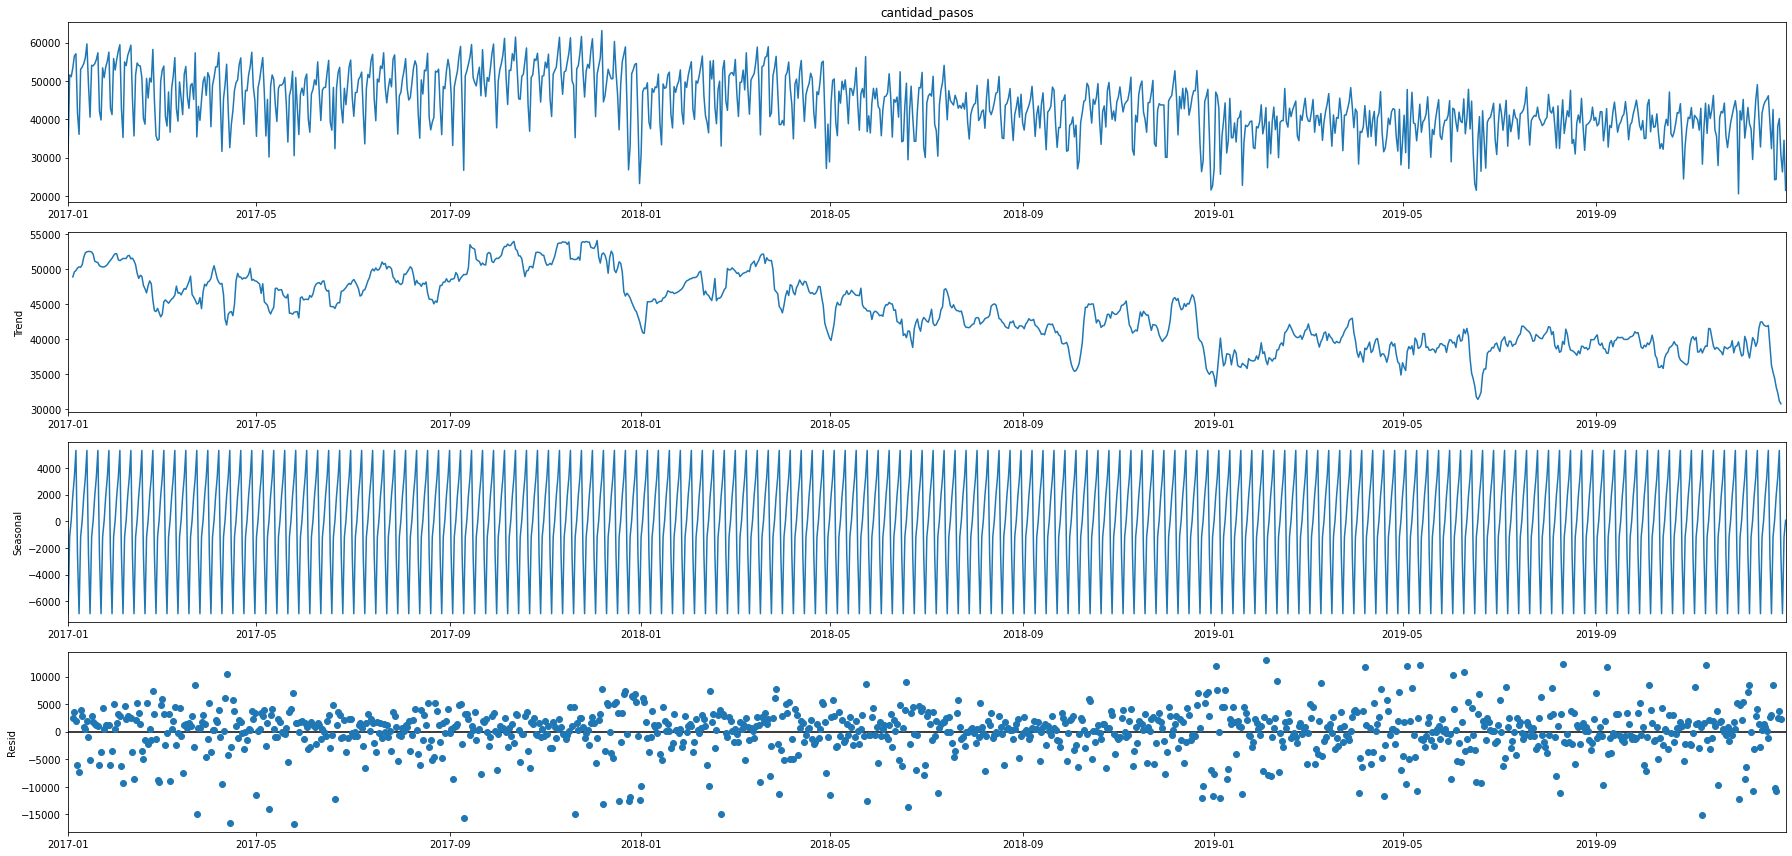

time: 609 ms (started: 2021-07-20 01:00:37 -03:00)


In [206]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [25,12]
result.plot()
plt.show()

__Gráfica 11.-__ se muestra una clara separación de las componentes de la serie original. La dispersión de los residuales en el periodo 2019 confirma el comportamiento errático de los valores, carentes de patrones cíclicos.

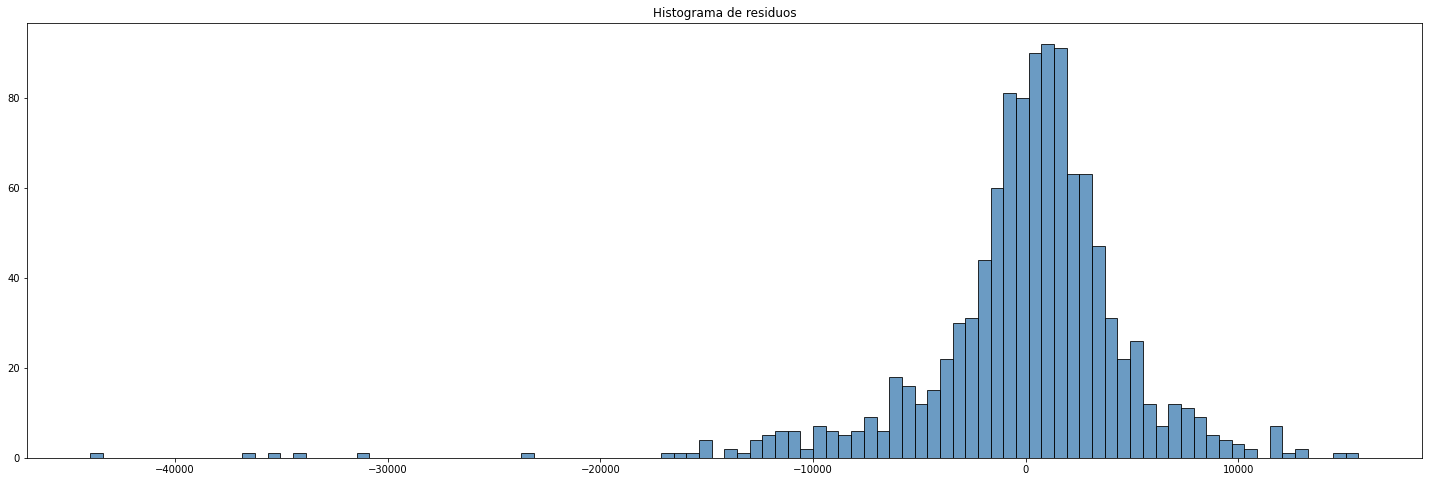

time: 344 ms (started: 2021-07-15 02:22:00 -03:00)


In [46]:
# Graficamos la distribución de los residuos (varianza) 
plt.figure(figsize=(25,8))
plt.title("Histograma de residuos")
plt.hist(result.resid, bins=100, alpha=0.8,
         histtype='bar', color='steelblue',
         edgecolor='black', )
plt.show()

__Gráfica 12.-__ histograma mostrando la distribución de los valores de residuos.

___

## 8.- Tratamiento de valores atípicos

In [218]:
# Resampleamos nuestros datos a una frecuencia diaria
diario = dataset.resample('D', on = 'fecha').sum().astype("float64")
print(diario.shape)
diario.describe()

(1095, 1)


,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


time: 15 ms (started: 2021-07-20 01:14:03 -03:00)


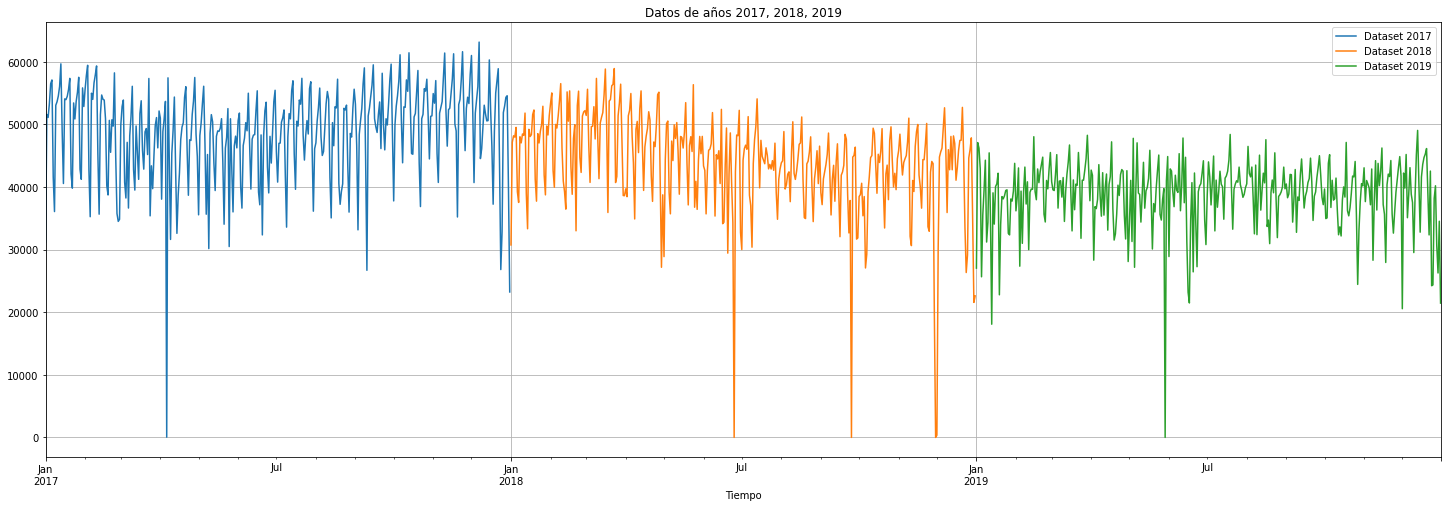

time: 750 ms (started: 2021-07-20 01:13:02 -03:00)


In [213]:
plt.figure(figsize=(25,8))
diario_2017['cantidad_pasos'].plot(legend=True)
diario_2018['cantidad_pasos'].plot(legend=True)
diario_2019['cantidad_pasos'].plot(legend=True)
plt.xlabel("Tiempo")
plt.title("Datos de años 2017, 2018, 2019")
plt.legend(['Dataset 2017', 'Dataset 2018', 'Dataset 2019'])
plt.setp(ax.get_xticklabels(), rotation=0)
plt.grid()
plt.show()

__Gráfica 13.-__ vemos en cada año los valores atípicos que llegaron a cero.

In [219]:
# Ubicamos las fechas con valores de pasos extraordinariamente bajos
atipicos = diario[(diario.cantidad_pasos <= 18000)]
atipicos

,cantidad_pasos
fecha,
2017-04-06,40.0
2018-06-25,0.0
2018-09-25,0.0
2018-11-30,0.0
2018-12-01,350.0
2019-05-29,0.0


time: 0 ns (started: 2021-07-20 01:14:15 -03:00)


Ubicamos los valores cuyo conteo de pasos diarios fueron iguales o inferiores a 10000 pasos.

In [221]:
# Convertimos los atipicos a NaN
diario.cantidad_pasos[diario.cantidad_pasos <=18000] = np.nan
print(diario.isna().sum())
diario = diario.interpolate(method='nearest', k=4)
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64
time: 407 ms (started: 2021-07-20 01:14:50 -03:00)


Se imputaron los valores de los registros con valores atípicos inferiores a 18000 pasos. Se usó el metodo de "interpolate" usando los 4 más cercanos.

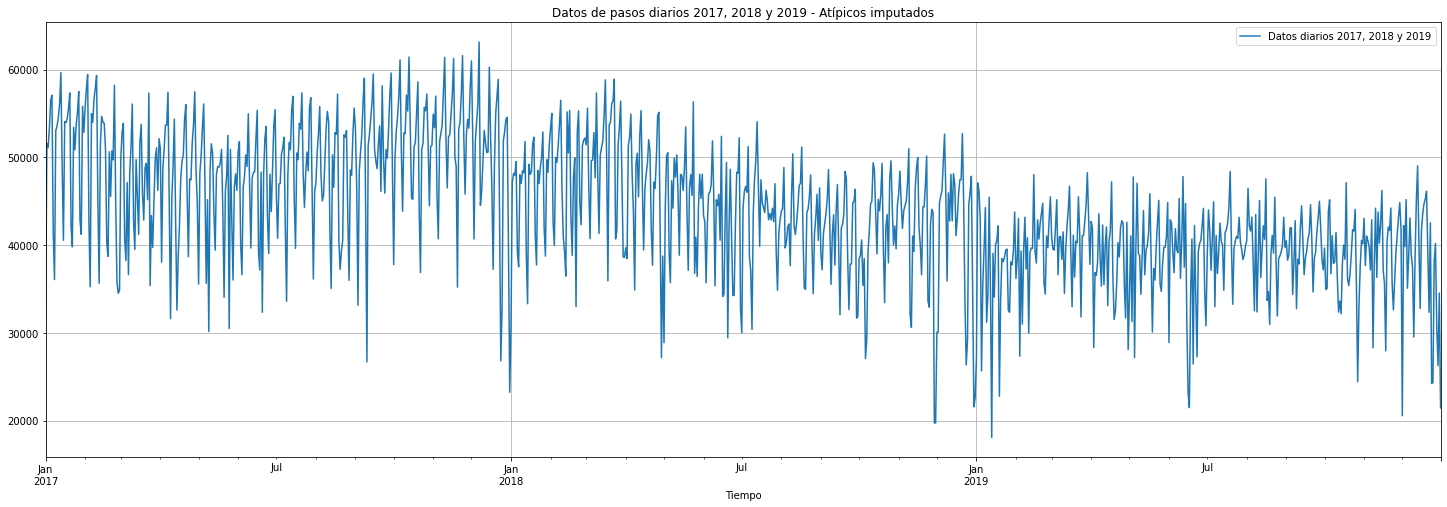

time: 250 ms (started: 2021-07-20 01:14:54 -03:00)


In [222]:
plt.figure(figsize=(25,8))
diario['cantidad_pasos'].plot(legend=True)
plt.xlabel("Tiempo")
plt.title("Datos de pasos diarios 2017, 2018 y 2019 - Atípicos imputados")
plt.legend(['Datos diarios 2017, 2018 y 2019'])
plt.setp(ax.get_xticklabels(), rotation=0)
plt.grid()
plt.show()

__Gráfica 14.-__ muestra las curvas de datos tras ser tratados los valores atípicos menores a 18000.

__Análisis y entendimiento de los outliers:__

Al tener conocimiento de las fechas cuyos niveles de tráfico fueron extraordinariamente bajos, se hizo una rápida revisión hemerográfica en ediciones digitales de medios locales.

* El día 6 Abril 2017. Celebración del Foro Económico Mundial. 
https://www.clarin.com/politica/mauricio-macri-inaugura-foro-economico-mundial_0_S1uyqTmpg.html
* El día 25 Junio 2018. Paro general por 24 horas que organizado por la CGT. https://www.clarin.com/politica/paro-general-frases_0_ryXhEDCbQ.html
* El día 25 Septiembre 2018. Huelga general de trabajadores. https://elpais.com/elpais/2018/09/25/album/1537897307_200774.html#foto_gal_7
* El día 30 Noviembre 2018. Celebración de Cumbre del G20 en Argentina. https://elpais.com/hemeroteca/2018-11-30/
* El día 1 Diciembre 2018. Continuación de Cumbre del G20 en Argentina. https://elpais.com/elpais/2018/12/02/opinion/1543769110_557397.html
* El día 29 Mayo 2019. Paro de las centrales de trabajadores. https://elpais.com/internacional/2019/05/29/argentina/1559153842_024679.html

Tras conocer las razones de la disminución abrupta de los niveles de transito de vehículos en el área de estudio, se comprueba que dichos valores atípicos son genuinos. Son mediciones correctas del comportamiento real de la variable independiente, sin embargo dichos valres son originados por variables exógenas que no serán consideradas entre las variables que entrenarán nuestros modelos de aprendizaje automático en este trabajo.

___

## 8.- Modelos de Aprendizaje Automático

##### Predicción a Futuro

__Se debe implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019.__

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

__Tipo de problema de modelado:__

Claramente el planteamiento del problema sugiere la necesidad de desarrollar modelos de predicción de la variable precio en el conjunto de datos. Esta es una variable numérica contínua y su predicción se debe realizar a través del uso de algoritmos de regresión, donde se busca explicar la relación existente entre una variable dependiente (precio) y la variable o variables explicativas o independientes.

__La consigna plantea la generación de varios modelos de aprendizaje automático:__

*  __Moodelo benchmark:__ un modelo ingenuo el cual se generará usando el algoritmo de Random Forest.
*  __Modelo 1:__ basado en el algoritmo de Random Forest Optimizado por Grid Search CV.
*  __Modelo 2:__ basado en el algoritmo de Gradient Boosting Trees.
*  __Modelo 3:__ basado en el algoritmo de Redes Neuronales.
*  __Modelo 4:__ basado en algoritmos de enfoque estadístico ARIMA.

#### Preparación de los datos:

In [52]:
#Trabajaremos con la media semanal, ya que el modelo interpretará mejor los datos, también por el ruido que pudimos detectar anteriormente.
date = diario.resample("W").mean()
#date = date.drop(columns=["periodo"],axis = 1)
date

,cantidad_pasos
fecha,
2017-01-01,31183.000000
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
...,...
2019-12-08,40413.000000
2019-12-15,38994.285714
2019-12-22,41840.142857


time: 16 ms (started: 2021-07-15 02:22:12 -03:00)


In [53]:
# Trabajaremos con la media samanal, ya que el modelo interpretará mejor los datos, también por el ruido que pudimos detectar anteriormente.
date = date.resample("W").mean()
date

,cantidad_pasos
fecha,
2017-01-01,31183.000000
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
...,...
2019-12-08,40413.000000
2019-12-15,38994.285714
2019-12-22,41840.142857


time: 0 ns (started: 2021-07-15 02:22:12 -03:00)


In [54]:
date = date.cantidad_pasos
date

fecha
2017-01-01    31183.000000
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
                  ...     
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
2020-01-05    27985.000000
Freq: W-SUN, Name: cantidad_pasos, Length: 158, dtype: float64

time: 0 ns (started: 2021-07-15 02:22:12 -03:00)


#### Definición de variables para modelos

In [55]:
# Librerias que utilizaremos para la predicción.
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

time: 2.64 s (started: 2021-07-15 02:22:15 -03:00)


In [56]:
#
look_back = 12 # usamos doce semanas de datos para predecir el valor siguiente

#Creamos los `X` e `y` con ceros para luego llenar con los datos.  

N = date.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(145, 12) (145,)
time: 0 ns (started: 2021-07-15 02:22:18 -03:00)


In [57]:
date

fecha
2017-01-01    31183.000000
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
                  ...     
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
2020-01-05    27985.000000
Freq: W-SUN, Name: cantidad_pasos, Length: 158, dtype: float64

time: 0 ns (started: 2021-07-15 02:22:19 -03:00)


In [58]:
# Llenamos los X e y.

for i in range(X.shape[0]):
    X[i,] = date.iloc[i:i+look_back]
    y[i] = date.iloc[i+look_back]

time: 0 ns (started: 2021-07-15 02:22:19 -03:00)


In [59]:
N_train = 143 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 12 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(131, 12) (131,)
(12, 12) (12,)
time: 0 ns (started: 2021-07-15 02:22:20 -03:00)


In [60]:
y_test = y[N_train:N_train+N_test]
print(y_test)

[41081.14285714 38926.14285714 37262.85714286 38163.85714286
 37564.28571429 39018.42857143 38648.         40255.71428571
 37785.71428571 38079.28571429 40413.         38994.28571429]
time: 0 ns (started: 2021-07-15 02:22:20 -03:00)


## 8.1.-Modelo Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

time: 0 ns (started: 2021-07-15 02:22:22 -03:00)


In [62]:
# Definimos el modelo Random Forest.
modelo_RF =RandomForestRegressor(random_state=42, n_jobs = -1)

time: 0 ns (started: 2021-07-15 02:22:22 -03:00)


In [63]:
# Entrenamos el modelo
modelo_RF.fit(X_train , y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

time: 265 ms (started: 2021-07-15 02:22:23 -03:00)


In [64]:
y_pred_train_RF= modelo_RF.predict(X_train)
y_pred_test_RF = modelo_RF.predict(X_test)

time: 32 ms (started: 2021-07-15 02:22:25 -03:00)


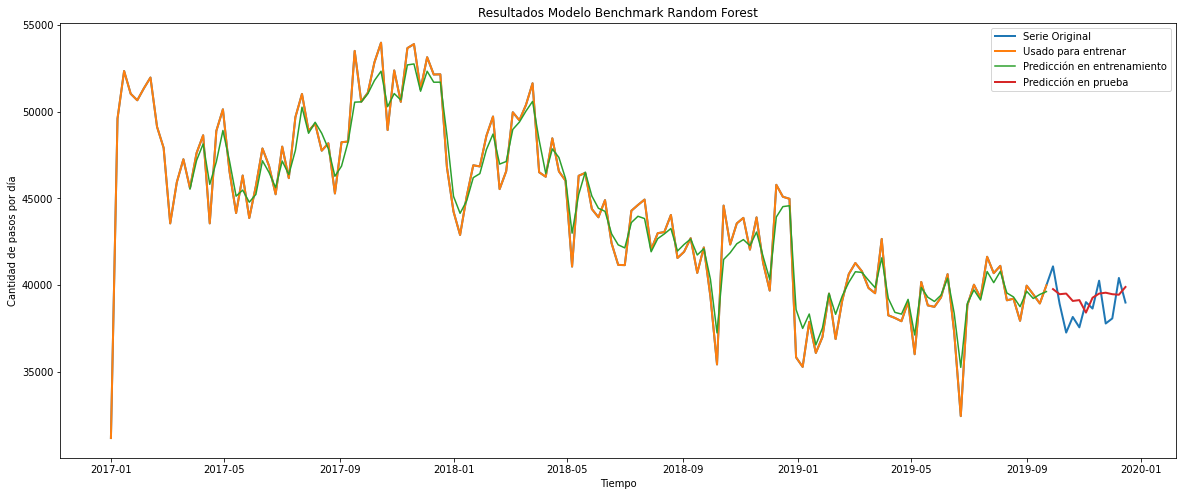

RMSE RFR en Train: 985.2523747304838
RMSE RFR en Test: 1243.4252497581942
time: 218 ms (started: 2021-07-15 02:22:25 -03:00)


In [65]:
# Graficamos
plt.figure(figsize=(20,8))
plt.plot(date.index[:length_total], date[:length_total],lw = 2, label = 'Serie Original')
plt.plot(date.index[:N_train + look_back], date[:N_train + look_back],lw = 2, label = 'Usado para entrenar')
plt.plot(date.index[look_back: look_back + N_train], y_pred_train_RF,label = 'Predicción en entrenamiento')
plt.plot(date.index[N_train+look_back: length_total], y_pred_test_RF, lw = 2, label = 'Predicción en prueba')
plt.title("Resultados Modelo Benchmark Random Forest")
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos por día')
plt.show()

rmse_RF_train =np.sqrt( mean_squared_error(y_train, y_pred_train_RF))
print('RMSE Random Forest en Train:',rmse_RF_train)

rmse_RF_test = np.sqrt(mean_squared_error(y_test, y_pred_test_RF))
print('RMSE Random Forest  en Test:',rmse_RF_test)

__Gráfica 19.-__ muestra en la curva roja la predicción objetivo del proyecto, evidentemente el desempeño es muy deficiente.

In [66]:
# Error Random Forest 
print("R2 Random Forest para el conjunto Train: ", r2_score(y_train, y_pred_train_RF))
print("R2 Random Forest para el conjunto Test: ",r2_score(y_test, y_pred_test_RF))

print("RMSE Entrenamiento: ", np.sqrt(mean_squared_error(y_train, y_pred_train_RF)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_pred_test_RF)))

R2 Random Forest para el conjunto Train:  0.9576516209785874
R2 Random Forest para el conjunto Test:  -0.16964129233350422
RMSE Entrenamiento:  985.2523747304838
RMSE Test:  1243.4252497581942
time: 0 ns (started: 2021-07-15 02:22:26 -03:00)


__Análisis:__ el modelo benchmark elegido para iniciar con las diferentes aproximaciones de algoritmos y probar el desempeño que mejor se ajuste al tipo de tarea predictiva del problema, fue el Random Forest Regressor. Claramente este algoritmo no tiene un buen desempeño en esta tarea.
__

### 8.2.-Optimización de Random Forest usando Grid Search CV

In [230]:
# Definimos la grilla
tss= TimeSeriesSplit(n_splits=2)

param_grid_forest = {"n_estimators":[100,200,300,350],
                    "max_features": ["auto", "log2","sqrt"],
                     "min_samples_leaf":[0.01,0.1,1],
                     "criterion":["mse","mae","rmse"],
                     "min_samples_split":[0.1,0.01,1,2],
                     "max_depth": [None,5,10,15,20],
                    "oob_score":[True]}


time: 0 ns (started: 2021-07-23 03:05:01 -03:00)


In [231]:
# Definimos el modelo Random Forest Regressor para ser optimizado por Grid Search CV
modelo_RF_GS= RandomForestRegressor(random_state=42)
modelo_RF_GS =GridSearchCV(modelo_RF_GS, param_grid= param_grid_forest, cv=tss, n_jobs=-2)

time: 0 ns (started: 2021-07-23 03:05:15 -03:00)


In [232]:
# Entrenamos el modelo optimizado - Duración aproximada 3 minutos
modelo_RF_GS.fit(X_train,y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=2),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-2,
             param_grid={'criterion': ['mse', 'mae', 'rmse'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [0.01, 0.1, 1],
                         'min_samples_split': [0.1, 0.01, 1, 2],
                         'n_estimators': [100, 200, 300, 350],
                         'oob_score': [True]})

time: 3min 43s (started: 2021-07-23 03:05:16 -03:00)


In [233]:
# Verificamos la tabla de resultados
pd.DataFrame(modelo_RF_GS.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_oob_score,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
176,0.236367,0.000996,0.009974,5.960464e-07,mse,5,auto,1,0.1,100,True,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",-0.443858,-0.335350,-0.389604,0.054254,1
144,0.208942,0.012467,0.008976,3.576279e-07,mse,5,auto,0.01,0.1,100,True,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",-0.443858,-0.335350,-0.389604,0.054254,1
0,0.213429,0.009976,0.007480,1.496077e-03,mse,None,auto,0.01,0.1,100,True,"{'criterion': 'mse', 'max_depth': None, 'max_f...",-0.452643,-0.337402,-0.395023,0.057620,3
464,0.274267,0.007979,0.011969,0.000000e+00,mse,15,auto,1,0.1,100,True,"{'criterion': 'mse', 'max_depth': 15, 'max_fea...",-0.452643,-0.337402,-0.395023,0.057620,3
32,0.222904,0.005485,0.008976,2.384186e-07,mse,None,auto,1,0.1,100,True,"{'criterion': 'mse', 'max_depth': None, 'max_f...",-0.452643,-0.337402,-0.395023,0.057620,3


time: 359 ms (started: 2021-07-23 03:09:30 -03:00)


In [234]:
# Consultamos los resultados de mejor combinación de hiperparámetros para el preformance óptimo
print("Mejores hiperparámetros: "+str(modelo_RF_GS.best_params_))
print("Mejor Score: "+(str(abs(modelo_RF_GS.best_score_))+'\n'))

Mejores hiperparámetros: {'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.1, 'n_estimators': 100, 'oob_score': True}
Mejor Score: 0.3896041088998037

time: 0 ns (started: 2021-07-23 03:09:37 -03:00)


## 8.3.-Entrenamiento de Modelo Random Forest con parámetros obtenidos de la optimización con Gride Search CV

Entrenamos un nuevo modelo Random Forest definido desde cero con los parámetros resultantes del Grid Search CV 

In [237]:
# Definimos un nuevo modelo RF con mejores hiperparámetros
modelo_RF_hp_opt= RandomForestRegressor(criterion= 'mse', max_depth= 5, max_features= 'auto', min_samples_leaf= 0.01, min_samples_split= 0.1, n_estimators= 100, oob_score= True)

time: 0 ns (started: 2021-07-23 03:11:58 -03:00)


In [238]:
# Entrenamos
modelo_RF_hp_opt.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=0.01, min_samples_split=0.1,
                      oob_score=True)

time: 140 ms (started: 2021-07-23 03:12:00 -03:00)


In [239]:
# Predecimos
y_pred_train_RF_opt = modelo_RF_hp_opt.predict(X_train)
y_pred_test_RF_opt = modelo_RF_hp_opt.predict(X_test)

time: 16 ms (started: 2021-07-23 03:12:03 -03:00)


In [240]:
# Consultamos el error
print("R2 Random Forest para el conjunto Train: ", r2_score(y_train, y_pred_train_RF_opt))
print("R2 Random Forest para el conjunto Test: ",r2_score(y_test, y_pred_test_RF_opt))


rmse_RF_GridS_CV= np.sqrt(mean_squared_error(y_test, y_pred_test_RF_opt))
print("RMSE Random Forest CV Train: ", np.sqrt(mean_squared_error(y_train, y_pred_train_RF_opt)))
print("RMSE Random Forest CV Test: ", np.sqrt(mean_squared_error(y_test, y_pred_test_RF_opt)))

R2 Random Forest para el conjunto Train:  0.8805955050809673
R2 Random Forest para el conjunto Test:  -0.023998247399806605
RMSE Random Forest CV Train:  1654.395852107164
RMSE Random Forest CV Test:  1163.4371918163192
time: 0 ns (started: 2021-07-23 03:12:06 -03:00)


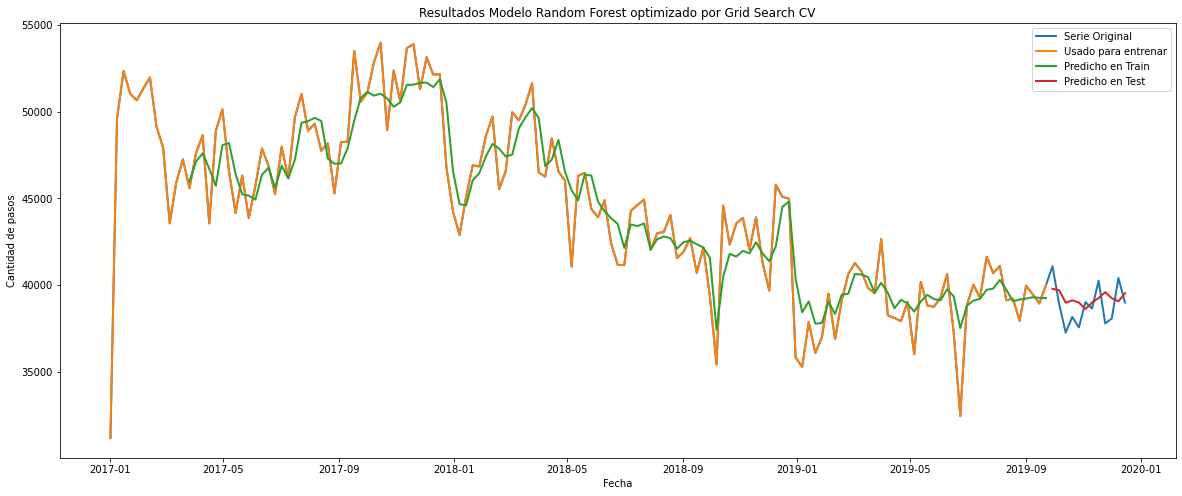

RMSE RFR_opt en Train: 1654.395852107164
RMSE RFR_opt en Test: 1163.4371918163192
time: 219 ms (started: 2021-07-23 03:12:14 -03:00)


In [241]:

plt.figure(figsize=(20,8))
plt.plot(date.index[:length_total], date[:length_total],lw = 2, label = 'Serie Original')
plt.plot(date.index[:N_train + look_back], date[:N_train + look_back], lw = 2,label = 'Usado para entrenar')
plt.plot(date.index[look_back: look_back + N_train], y_pred_train_RF_opt, lw = 2, label = 'Predicho en Train')
plt.plot(date.index[N_train+look_back: length_total], y_pred_test_RF_opt, lw = 2, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title("Resultados Modelo Random Forest optimizado por Grid Search CV")
plt.show()
rmse_RFR_opt_train = np.sqrt(mean_squared_error(y_train, y_pred_train_RF_opt))
print('RMSE RFR_opt en Train:',rmse_RFR_opt_train)

rmse_RFR_opt_test =np.sqrt( mean_squared_error(y_test, y_pred_test_RF_opt))
print('RMSE RFR_opt en Test:',rmse_RFR_opt_test)

__Gráfica 20.-__ muestra que el patrón de la curva de predicción en rojo no se asimila en nada con el comportamiento del periodo de tiempo que este proyecto tiene como objetivo. Si bien el performance fue apenas mejor que en el modelo benchmark, aún dista mucho de poder ser una predicción cercana a lo esperado.  

### 8.4.-Estimación de importancia de features en el modelo Random Forest Regressor Optimizado

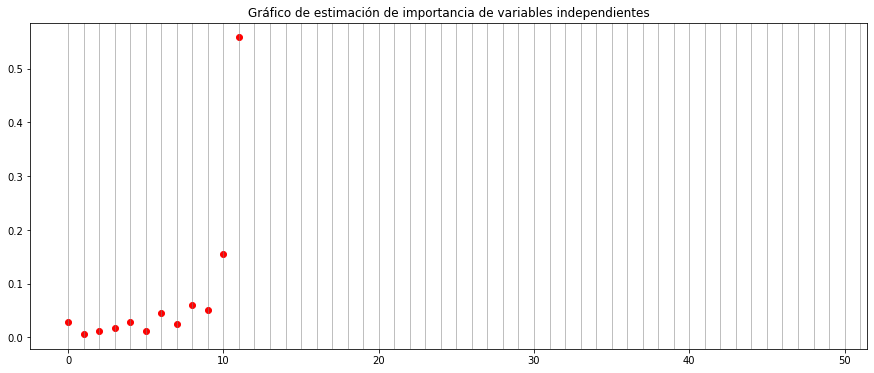

time: 172 ms (started: 2021-07-23 03:13:14 -03:00)


In [244]:
plt.figure(figsize = (15,6))

plt.scatter(np.arange(modelo_RF_hp_opt.feature_importances_.size),modelo_RF_hp_opt.feature_importances_,color='red')
plt . title ( "Gráfico de estimación de importancia de variables independientes" ) 
for x in range(52):
    plt.axvline(x, lw=0.5, color= 'gray')
    
plt.show()

__Gráfica 21.-__ el análisis de la importancia de las variables independientes parece indicar que de las 12 utilizadas en la predicción, las últimas 2 semanas son las que más aportan explicabilidad al modelo. Sin embargo considerando el bajísimo performance en la predicción de este modelo, se puede descartar este resultado del análisis de importancia de features.
___

### 8.5.-Modelo Gradient Boosting Trees

In [78]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

time: 2.08 s (started: 2021-07-15 02:25:27 -03:00)


In [79]:
# Definimos los parámetros
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

time: 0 ns (started: 2021-07-15 02:25:29 -03:00)


In [80]:
# Definimos y entrenamos el modelo
modelo_GBT = ensemble.GradientBoostingRegressor(**params)
modelo_GBT.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

time: 235 ms (started: 2021-07-15 02:25:29 -03:00)


In [81]:
# Predicción
y_pred_train_GBT = modelo_GBT.predict(X_train)
y_pred_test_GBT = modelo_GBT.predict(X_test)

time: 0 ns (started: 2021-07-15 02:25:29 -03:00)


In [245]:
rmse_GBT = np.sqrt(mean_squared_error(y_test, modelo_GBT.predict(X_test)))
print("RMSE en Test: {:.4f}".format(rmse_GBT))

RMSE en Test: 1094.2940
time: 15 ms (started: 2021-07-23 03:22:02 -03:00)


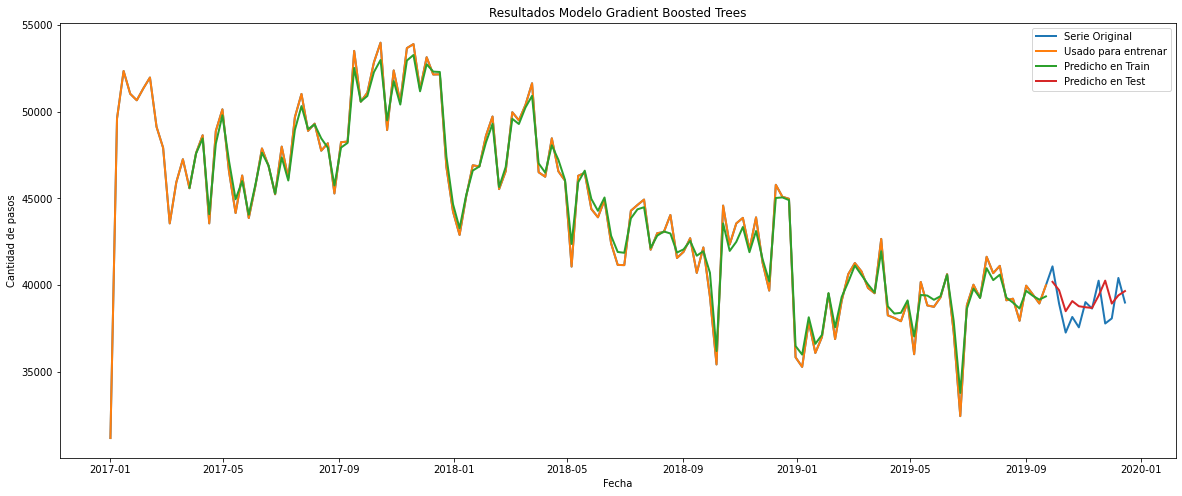

RMSE GBT en Train: 510.8692581997387
RMSE GBT en Test: 1094.2940185518412
time: 219 ms (started: 2021-07-23 03:36:12 -03:00)


In [248]:
plt.figure(figsize=(20,8))
plt.plot(date.index[:length_total], date[:length_total],lw = 2, label = 'Serie Original')
plt.plot(date.index[:N_train + look_back], date[:N_train + look_back], lw = 2,label = 'Usado para entrenar')
plt.plot(date.index[look_back: look_back + N_train], y_pred_train_GBT, lw = 2, label = 'Predicho en Train')
plt.plot(date.index[N_train+look_back: length_total], y_pred_test_GBT, lw = 2, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title("Resultados Modelo Gradient Boosted Trees")
plt.show()
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_GBT))
print('RMSE GBT en Train:',rmse)

rmse =np.sqrt( mean_squared_error(y_test, y_pred_test_GBT))
print('RMSE GBT en Test:',rmse)

__Gráfica 22.-__ muestra como el modelo basado en algoritmos de Gradient Boosted Trees comienza a mostrar una morfología con un comportamiento un poco parecido al intervalo a predecir. La métrica RMSE mejoró un poco respecto al modelo Random Forest Optimizado.

## 9.- Modelos de Redes Neuronales

In [85]:
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import math

time: 22.5 s (started: 2021-07-15 02:25:30 -03:00)


### 9.1.-Spiking Neural Network - Monocapa 

In [86]:
def create_red1():
    model = Sequential()
    model.add(Dense(10, input_dim=look_back, activation='relu'))
    model.add(Dense(1))
    
    return model

time: 0 ns (started: 2021-07-15 02:25:52 -03:00)


In [87]:
# Definimos el modelo
snn_model1 = create_red1()  

time: 1.84 s (started: 2021-07-15 02:25:52 -03:00)


In [88]:
snn_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                130       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
time: 0 ns (started: 2021-07-15 02:25:54 -03:00)


In [89]:
# “optimizador” de los pesos de las conexiones de las neuronas y las métricas que queremos obtener.
snn_model1.compile(loss='mean_squared_error', optimizer='adam')

time: 16 ms (started: 2021-07-15 02:25:54 -03:00)


In [90]:
snn_model1.fit(X_train, y_train, epochs=750, batch_size=2, verbose=0)

time: 33.1 s (started: 2021-07-15 02:25:54 -03:00)


In [91]:
# Predicción
y_train_pred_rn1 = snn_model1.predict(X_train)
y_test_pred_rn1 = snn_model1.predict(X_test)

time: 344 ms (started: 2021-07-15 02:26:27 -03:00)


In [247]:
# Consultamos métricas
trainScore = snn_model1.evaluate(X_train, y_train, verbose=0)
print('Métricas en Train: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = snn_model1.evaluate(X_test, y_test, verbose=0)
print('Métricas en Test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Métricas en Train: 5392833.00 MSE (2322.25 RMSE)
Métricas en Test: 1834384.38 MSE (1354.39 RMSE)
time: 78 ms (started: 2021-07-23 03:34:18 -03:00)


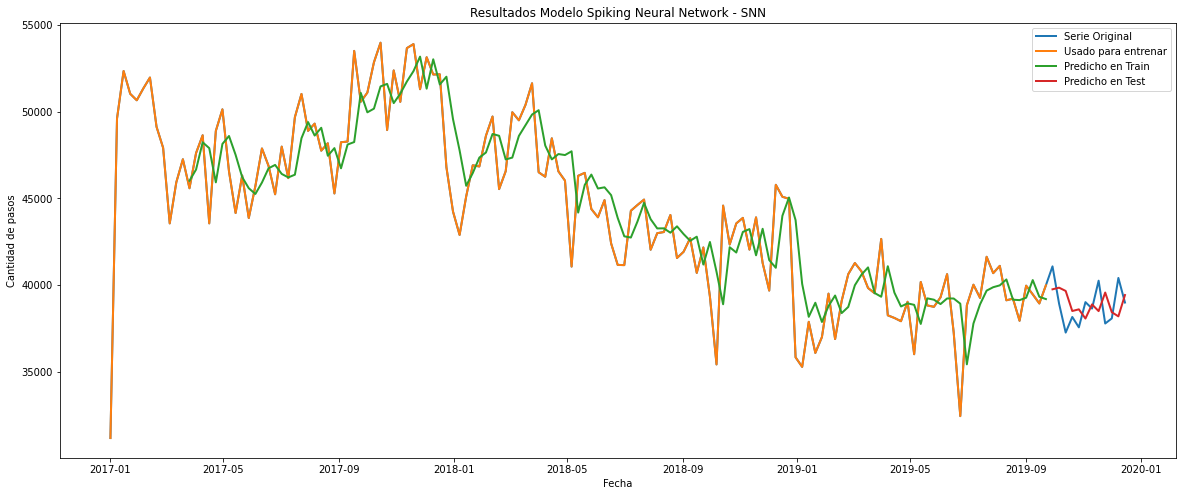

RMSE RNN SNN Monocapa en Train: 2322.2472882610055
RMSE RNN SNN Monocapa en Test: 1354.3944263204119
time: 203 ms (started: 2021-07-23 03:45:08 -03:00)


In [261]:
plt.figure(figsize=(20,8))
plt.plot(date.index[:length_total], date[:length_total],lw = 2, label = 'Serie Original')
plt.plot(date.index[:N_train + look_back], date[:N_train + look_back], lw = 2,label = 'Usado para entrenar')
plt.plot(date.index[look_back: look_back + N_train], y_train_pred_rn1, lw = 2, label = 'Predicho en Train')
plt.plot(date.index[N_train+look_back: length_total], y_test_pred_rn1, lw = 2, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title("Resultados Modelo Spiking Neural Network - SNN")
plt.show()
rmse_SNN1_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rn1))
print('RMSE RNN SNN Monocapa en Train:',rmse_SNN1_train)

rmse_SNN1_test =np.sqrt( mean_squared_error(y_test, y_test_pred_rn1))
print('RMSE RNN SNN Monocapa en Test:',rmse_SNN1_test)

__Gráfica 23.-__ la primera aproximación empleando algoritmos de redes neuronales para el modelo predictivo, aunque en el patrón de la curva resultante intenta parecerse al patrón a predecir, la métrica RMSE muestra un performance muy bajo, incluso peor que el del benchmark. Esto sugieres que esta aproximación es posiblemente la menos adecuada para esta tarea.

### 9.2.-Spiking Neural Network - Multicapa 

In [94]:
def create_red():
    model = Sequential()
    model.add(Dense(10, input_dim=look_back, activation='relu'))
    model.add(Dense(10))
    model.add(Dense(8))
    model.add(Dense(1))
    
    return model

time: 0 ns (started: 2021-07-15 02:26:28 -03:00)


In [95]:
snn_model = create_red()  

time: 16 ms (started: 2021-07-15 02:26:28 -03:00)


In [96]:
snn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
time: 0 ns (started: 2021-07-15 02:26:28 -03:00)


In [97]:
snn_model.compile(loss='mean_squared_error', optimizer='adam')

time: 0 ns (started: 2021-07-15 02:26:28 -03:00)


In [98]:
snn_model.fit(X_train, y_train, epochs=750, batch_size=2, verbose=0)

time: 20 s (started: 2021-07-15 02:26:28 -03:00)


In [262]:
# Predicción
y_train_pred_rn = snn_model.predict(X_train)
y_test_pred_rn = snn_model.predict(X_test)

time: 641 ms (started: 2021-07-23 03:49:33 -03:00)


In [263]:
print("R2 Entrenamiento SNN multi",r2_score(y_train,y_train_pred_rn))
print("R2 Test SNN multi ", r2_score(y_test,y_test_pred_rn))
print("RMSE Entrenamiento: ", np.sqrt(mean_squared_error(y_train, y_train_pred_rn)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_test_pred_rn)))

R2 Entrenamiento SNN multi 0.7596492830489054
R2 Test SNN multi  -0.458137273700318
RMSE Entrenamiento:  2347.2092369671727
RMSE Test:  1388.3294686401694
time: 0 ns (started: 2021-07-23 03:49:36 -03:00)


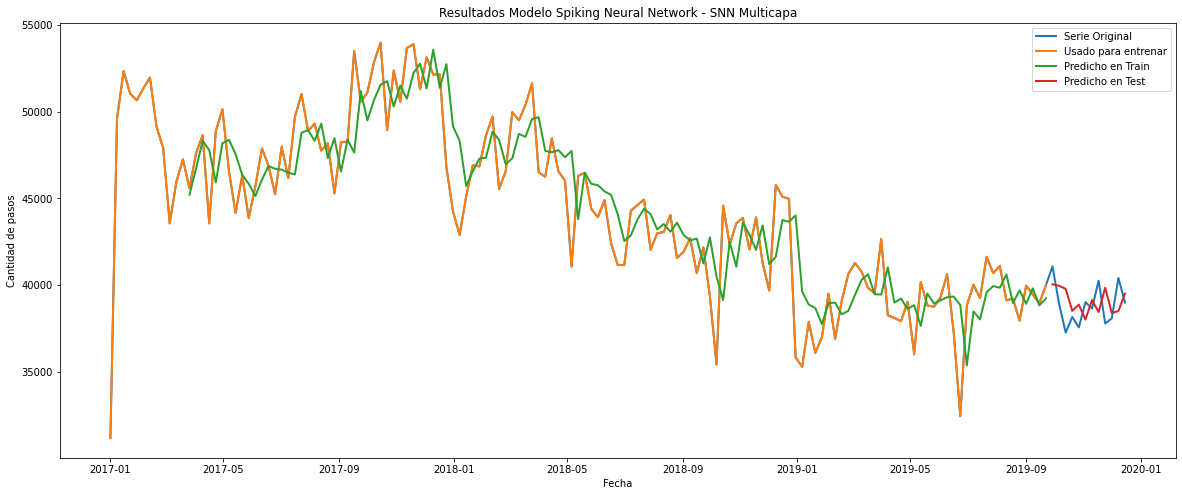

RMSE RFR en Train: 2347.2092369671727
RMSE RFR en Test: 1388.3294686401694
time: 203 ms (started: 2021-07-23 03:50:31 -03:00)


In [264]:
plt.figure(figsize=(20,8))
plt.plot(date.index[:length_total], date[:length_total],lw = 2, label = 'Serie Original')
plt.plot(date.index[:N_train + look_back], date[:N_train + look_back], lw = 2,label = 'Usado para entrenar')
plt.plot(date.index[look_back: look_back + N_train], y_train_pred_rn, lw = 2, label = 'Predicho en Train')
plt.plot(date.index[N_train+look_back: length_total], y_test_pred_rn, lw = 2, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title("Resultados Modelo Spiking Neural Network - SNN Multicapa")
plt.show()
rmse_SNN2_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rn))
print('RMSE RFR en Train:',rmse_SNN2_train)

rmse_SNN2_test =np.sqrt( mean_squared_error(y_test, y_test_pred_rn))
print('RMSE RFR en Test:',rmse_SNN2_test)

__Gráfica 24.-__ se comprueba que los modelos basados en redes neuronales no arrojan buenos resultados para esta tarea de predicción de series temporales.

__Analisis:__

___

## 10.-Modelos Estadísticos

__Elementos de Tendencia:__
En los modelos SARIMAX existen 3 elementos que requeiren ser configurados.

- p: Orden de tendencia de autoregresión.
- d: Orden de diferencia de tendencia.
- q: Orden de tendencia de promedio móvil.

__Elementos de temporalidad:__
Existen 4 elmentos a ser configurados

- P: Orden temporal autoregresivo.
- D: Orden de diferencia temporal.
- Q: Orden de promedio móvil temporal.
- m: El número de periodos de tiempo en un solo periodo temporal.


Fuente:
A Gentle Introduction to SARIMA for Time Series Forecasting in Python. by Jason Brownlee on August 17, 2018. https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

In [102]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

time: 4.8 s (started: 2021-07-15 02:26:49 -03:00)


In [103]:
# 
d=range(0,3)
p=q=range(7,16)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(7, 0, 8) x(7, 0, 8, 12)
SARIMAX:(7, 0, 8) x(7, 0, 9, 12)
SARIMAX:(7, 0, 9) x(7, 0, 10, 12)
SARIMAX:(7, 0, 9) x(7, 0, 11, 12)
time: 0 ns (started: 2021-07-15 02:26:53 -03:00)


In [ ]:
d=range(0,3)
p=q=range(8,16)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX (date,
                                           order= param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results=mod.fit()
            
            print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal, results.aic))
            
        except:
            continue

SARIMAX(7, 0, 7)x(7, 0, 7, 12) - AIC:1268.3738117508967
SARIMAX(7, 0, 7)x(7, 0, 8, 12) - AIC:1034.0157287148436
SARIMAX(7, 0, 7)x(7, 0, 9, 12) - AIC:813.733017243156
SARIMAX(7, 0, 7)x(7, 0, 10, 12) - AIC:598.0920100145478
SARIMAX(7, 0, 7)x(7, 0, 11, 12) - AIC:384.62102781513653
SARIMAX(7, 0, 7)x(7, 0, 12, 12) - AIC:172.99150391612278
SARIMAX(7, 0, 7)x(7, 0, 13, 12) - AIC:70.0
SARIMAX(7, 0, 7)x(7, 0, 14, 12) - AIC:72.0
SARIMAX(7, 0, 7)x(7, 0, 15, 12) - AIC:74.0
SARIMAX(7, 0, 7)x(7, 1, 7, 12) - AIC:1048.6572713054372
SARIMAX(7, 0, 7)x(7, 1, 8, 12) - AIC:827.7261671428028
SARIMAX(7, 0, 7)x(7, 1, 9, 12) - AIC:605.6903913144449
SARIMAX(7, 0, 7)x(7, 1, 10, 12) - AIC:388.7589865832036
SARIMAX(7, 0, 7)x(7, 1, 11, 12) - AIC:174.10615161995307
SARIMAX(7, 0, 7)x(7, 1, 12, 12) - AIC:68.0
SARIMAX(7, 0, 7)x(7, 1, 13, 12) - AIC:70.0
SARIMAX(7, 0, 7)x(7, 1, 14, 12) - AIC:72.0
SARIMAX(7, 0, 7)x(7, 1, 15, 12) - AIC:74.0
SARIMAX(7, 0, 7)x(7, 2, 7, 12) - AIC:862.6787749599405
SARIMAX(7, 0, 7)x(7, 2, 8, 12

__Nota:__ la celda anterior fue configurada para ser calculada en una notebook Core i7 8th Gen, 16GB Ram; en la que tardó casi 96 ininterrumpidas horas para llegar a estos resultados.

In [140]:
# Entrenamos el modelo con la ultima combinación del ciclo For para el sarimax.
model = sm.tsa.statespace.SARIMAX(date,
                                order=(9, 1, 10),
                                seasonal_order=(10, 1, 8, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultado = model.fit()
print(resultado.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5524     24.127      0.023      0.982     -46.735      47.840
ar.L2          0.1161     14.813      0.008      0.994     -28.916      29.149
ar.L3         -0.2899     17.150     -0.017      0.987     -33.904      33.324
ar.L4         -0.9212     23.091     -0.040      0.968     -46.179      44.336
ar.L5          0.5878     21.376      0.027      0.978     -41.308      42.484
ar.L6         -0.2786     12.537     -0.022      0.982     -24.851      24.293
ar.L7         -0.8756     10.800     -0.081      0.935     -22.043      20.292
ar.L8         -0.2173     19.439     -0.011      0.991     -38.316      37.882
ar.L9          0.4211     15.346      0.027      0.978     -29.656      30.498
ma.L1          0.1421     10.788      0.013      0.989     -21.002      21.286
ma.L2          0.0067     10.132      0.001      0.9

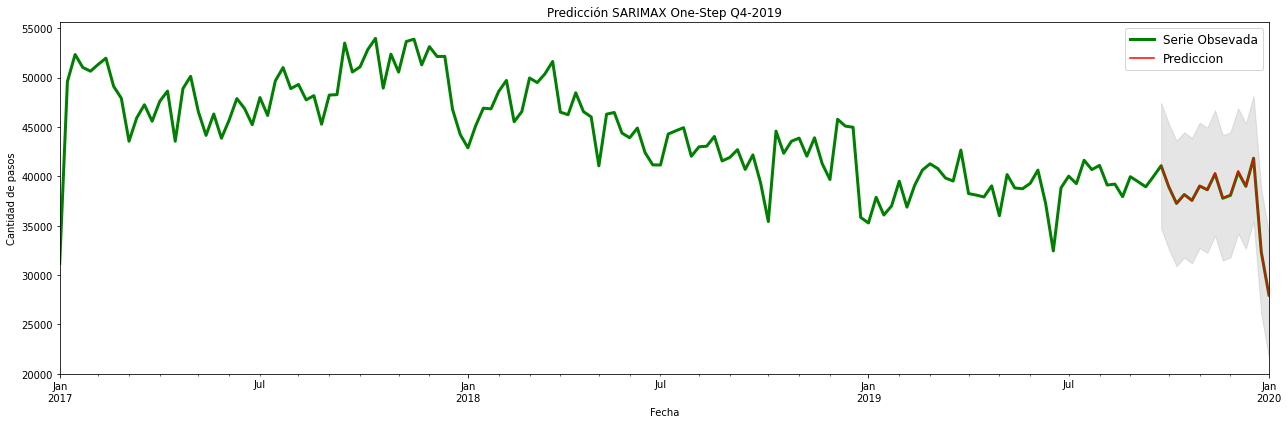

time: 266 ms (started: 2021-07-23 04:26:56 -03:00)


In [272]:
# Graficamos la predicción para el último cuarto del 2019
pred_Q4_2019 = resultado.get_prediction(start=datetime.datetime(2019,9,29), dynamic=False)
pred_ci = pred_Q4_2019.conf_int()
ax = date['2017':].plot(label='Serie Obsevada',color='green',lw = 3,figsize=(18,6))

pred_Q4_2019.predicted_mean.plot(ax=ax, label='Prediccion', alpha=1, color='red')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='gray', alpha=.2)
plt.title("Predicción SARIMAX One-Step Q4-2019")
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

__Gráfica 25.-__ muestra el resultado del modelo SARIMAX Multi-step, comparada con todos los datos de los años 2017, 2018 y 2019. Se logra percibir un excelente comportamiento de la curva roja (predicción) siguiendo a la curva verde (datos reales), lo que finalmente valida de manera visual que el modelo utilizado comienza a dar buenos resultados en su capacidad predictiva. La zona de color gris muestra el "cono" de incertidumbre que representa la posible variabilidad de la predicción realizada.

In [273]:
y_predf1 = pred_Q4_2019.predicted_mean
y_real = date['2019-09-29':]

error_one1 = np.sqrt(mean_squared_error(y_predf1, y_real))
print('RMSE de One Step 2019: ', error_one1)

RMSE de One Step 2019:  60.51147944079023
time: 0 ns (started: 2021-07-23 04:27:10 -03:00)


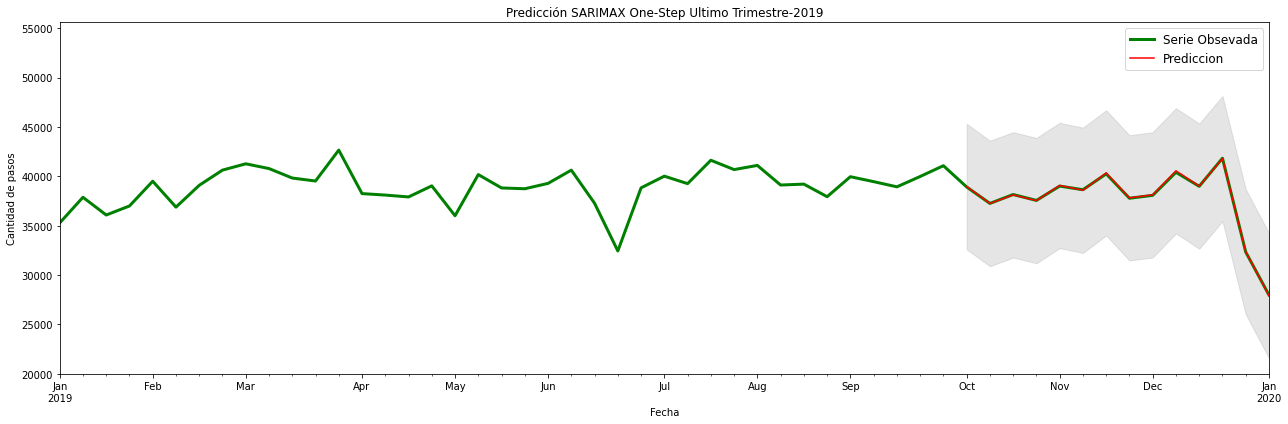

time: 313 ms (started: 2021-07-23 04:33:24 -03:00)


In [277]:
# Graficamos solo el año 2019 y su predicción de Q4
pred = resultado.get_prediction(start=datetime.datetime(2019,10,6), dynamic=False)
pred_ci = pred.conf_int()
ax = date['2017':].plot(label='Serie Obsevada',color='green',lw = 3,figsize=(18,6))

pred.predicted_mean.plot(ax=ax, label='Prediccion',  alpha=1, color='red')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title("Predicción SARIMAX One-Step Ultimo Trimestre-2019")
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')
plt.xlim(datetime.datetime(2019,1,1), datetime.datetime(2019,12,31))
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

__Gráfica 26.-__ muestra el resultado del modelo SARIMAX One-step, comparada con todos los datos del año 2019.

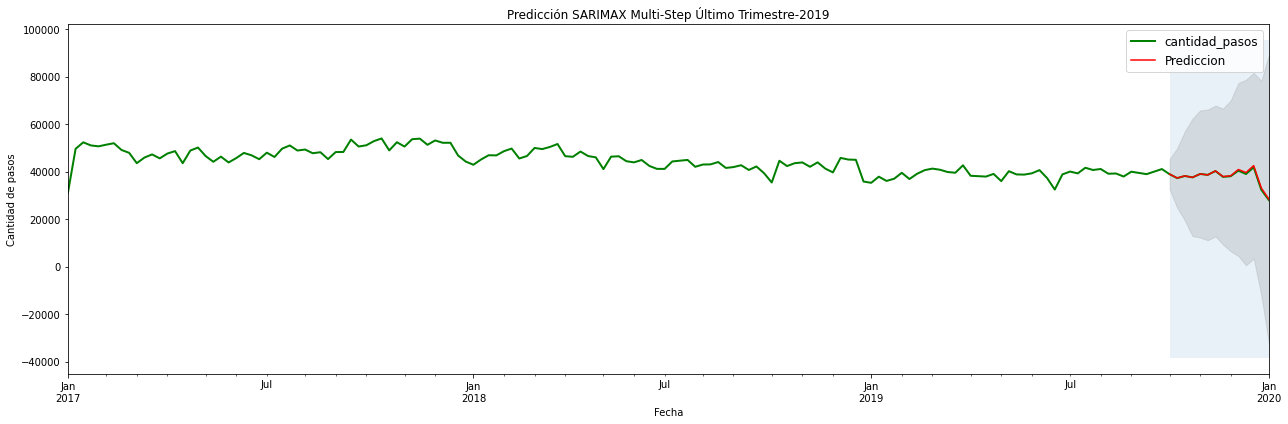

time: 328 ms (started: 2021-07-23 04:40:10 -03:00)


In [286]:
# 
pred_dynamic = resultado.get_prediction(start=datetime.datetime(2019,10,6), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = date['2017':].plot(color='green',lw = 2, figsize=(15, 5))

pred_dynamic.predicted_mean.plot(ax=ax, label='Prediccion', alpha=1, figsize=(18, 6), color='red')
plt.legend()
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='gray', alpha=.2)

ax.fill_betweenx(ax.get_ylim(), datetime.datetime(2019,10,6), date.index[-1],
                 alpha=.1, zorder=-1)
plt.title("Predicción SARIMAX Multi-Step Último Trimestre-2019")
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

__Gráfica 27.-__ muestra el resultado del modelo SARIMAX Multi-step, comparada con todos los datos de los años 2017, 2018 y 2019.

## 10.1.-Multi- Step Sarimax año 2019

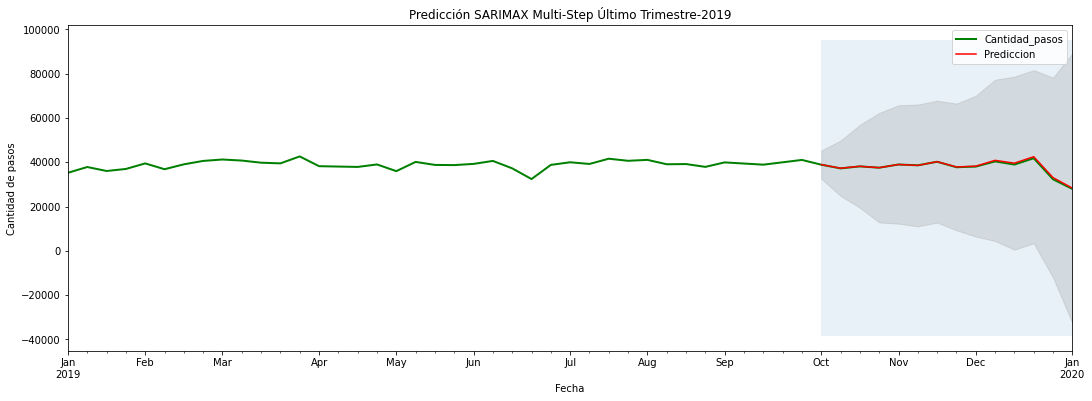

time: 328 ms (started: 2021-07-23 04:46:26 -03:00)


In [295]:
#Graficando solo el año 2019
pred_dynamic = resultado.get_prediction(start=datetime.datetime(2019,10,6), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = date['2017':].plot(label='Cantidad_pasos',color='green',lw = 2,figsize=(15, 6) )

pred_dynamic.predicted_mean.plot(ax=ax, label='Prediccion', alpha=1, figsize=(18, 6), color='red')
plt.legend()
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='gray', alpha=.2)

ax.fill_betweenx(ax.get_ylim(), datetime.datetime(2019,10,6), date.index[-1],
                 alpha=.1, zorder=-1)
plt.title("Predicción SARIMAX Multi-Step Último Trimestre-2019")
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')
plt.xlim(datetime.datetime(2019,1,1), datetime.datetime(2019,12,31))
plt.xticks()
plt.yticks()
plt.legend()


plt.show()

__Gráfica 28.-__ muestra la predicción del trimestre Q4 del 2019 usando el modelo SARIMAX Multi-Step, comparada con los datos correspondientes solamente al año 2019.

In [296]:
# Predicción
y_forecasted = pred_dynamic.predicted_mean
y_truth = date['2019-10-06':]

# Métricas
rmse_sm = np.sqrt(mean_squared_error(y_truth,y_forecasted ))
print(f'RMSE de SARIMAX Multi-Step es: {rmse_sm}')

RMSE de SARIMAX Multi-Step es: 364.9896449555935
time: 15 ms (started: 2021-07-23 04:47:58 -03:00)


## 11.-Comparación entre los modelos

In [297]:
result_d= {'Modelo':['Bnchmrk_RandomForest','RF_GridS_CV', 'Grad_Boost_Trees', 'RNN SNN Mono', 'RNN SNN Multi', 'SARIMAX-OS','SARIMAX-MS'],
           'Error':[rmse_RF_test, rmse_RF_GridS_CV, rmse_GBT, rmse_SNN1_test, rmse_SNN2_test, error_one1, rmse_sm]}
tabla=pd.DataFrame(result_d,)
tabla

,Modelo,Error
0,Bnchmrk_RandomForest,1243.425250
1,RF_GridS_CV,1163.437192
2,Grad_Boost_Trees,1094.294019
3,RNN SNN Mono,1354.394426
4,RNN SNN Multi,1388.329469
5,SARIMAX-OS,60.511479
6,SARIMAX-MS,364.989645


time: 0 ns (started: 2021-07-23 04:48:00 -03:00)


<Figure size 720x216 with 0 Axes>

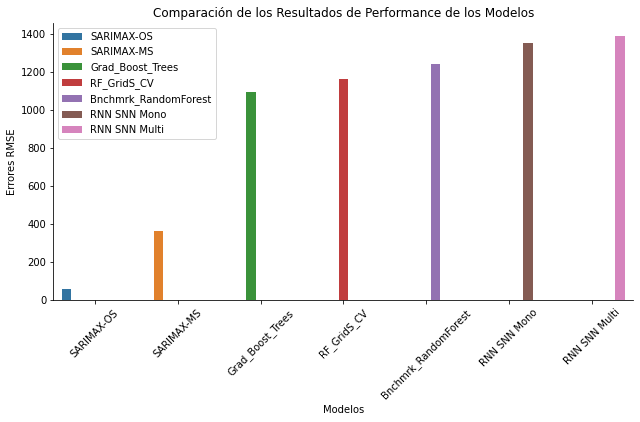

time: 500 ms (started: 2021-07-23 04:59:40 -03:00)


In [312]:
tabla.sort_values('Error',inplace=True)
plt.figure(figsize=(10, 3))
sns.catplot(x="Modelo", y="Error", hue = "Modelo", kind = "bar", data = tabla, legend = True, height=4.4, aspect=2/1 )
plt.xlabel("Modelos")
plt.xticks(rotation=45)
plt.title("Comparación de los Resultados de Performance de los Modelos")
plt.ylabel("Errores RMSE")

plt.ylim(ymin=0)
plt.legend(loc='best')
plt.show()

__Gráfica 29.-__ se muestra el resumen de los resultados de la métrica de desempeño RMSE utilizada para comparar el performance de los diferentes modelos entrenados y probados en la predicción del flujo de tráfico vehicular trimeste Q4 del año 2019.

## 12.-Predicción de tráfico para año 2020

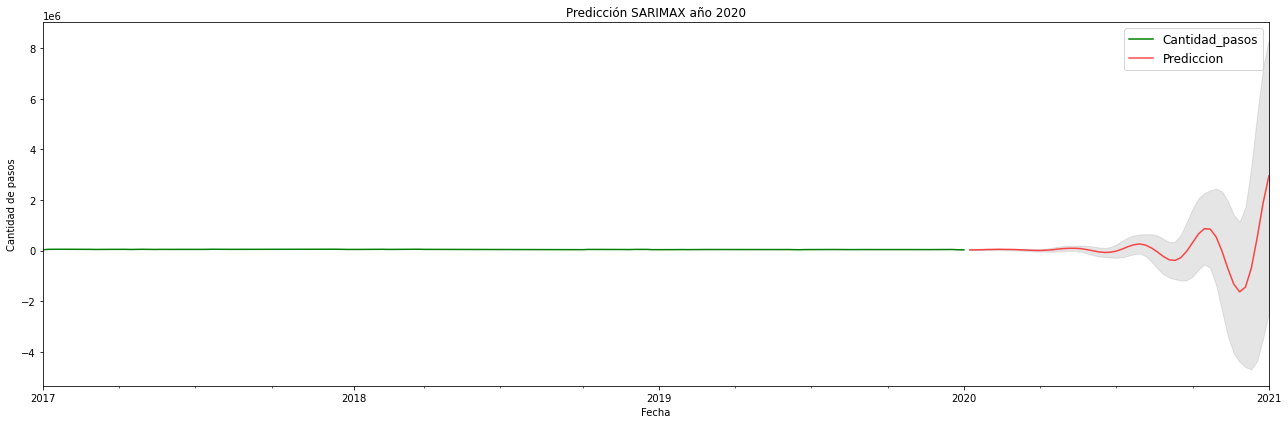

time: 282 ms (started: 2021-07-23 05:51:00 -03:00)


In [319]:
# Predicción para el año 2020.
predic_2020 = resultado.get_forecast(steps=datetime.datetime(2020,12,31), dynamic=False)
pred_ci = predic_2020 .conf_int()
ax = date.plot(label='Cantidad_pasos', color='green',figsize=(18,6))

pred_2020.predicted_mean.plot(ax=ax, label='Prediccion', alpha=.7, color='red')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='gray', alpha=.2)
plt.title("Predicción SARIMAX año 2020")
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

__Gráfica 30.-__ muestra la predicción de flujo vehicular para el año 2020, utilizando el modelo SRIMAX desarrollado entrenado con los años 2017, 2018 y Q1,Q2,Q3 del año 2019. 

__Análisis:__ debemos iniciar mencionando que el año 2020 fue un año históricamente atípico en el comportamiento social, especialemente la movilidad en las grandes ciudades y asentamientos humanos debido a la conocida pandemia de COVID-19 que afectó al planeta entero. Partiendo de esta perspectiva podemos sospechar que los resultados no serían comparables y su análisis carecería de validez por la situación mencionada.

Sin embargo para validar lo explicado arriba se investigó hasta obtener una fuente confiable de indicadores de movilidad de peatones y conductores recolectada por Apple (fuente: https://covid19.apple.com/mobility ) donde claramente se confirman las anomalías de movilidad del año 2020.

## 13.- Conlusiones del proyecto:

Tras la definición y entrenamiento de 7 modelos basados en 3 diferentes enfoques para la tarea de predicción de series de tiempo, se pudo observar que los algoritmos convencionales de Machine Learning y los modelos basados en Redes Neuronales utilizados (Random Forest, Gradient Boosted Trees, Redes Neuronales Spiking o de "Espigas") mostraron serias limitantes en el poder predictivo en este caso específico. 

Los resultados de performance RMSE de cada realización con los distintos enfoques está resumida en el __gráfico 29__ donde claramente se percibe un bajo desempeño de los primeros modelos utilizados, para finalmente obtener resultados aceptables tanto a nivel gráfico como en los valores de RMSE de los modelos basados en promedio móvil integrado autoregresivo estacional con factores exógenos o __SARIMAX__, el cual  mostró el mejor desempeño en comparación con los primeros modelos utilizados.

Tras el análisis minucioso tanto visual como con el uso de las herramientas analíticas de EDA, se pudo notar diferencias importantes en el comportamiento de la ciclicidad de las series entre los 3 años en estudio. La predicción se intentó realizar en el año con el comportamiento más atípico de los 3 años, lo que posiblemente haya sido una limitante importante para los algoritmos que no son especializados en la predicción de series de tiempo.
___

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

## 14.- __Para Investigar o probar:__

Con el objetivo de mejorar la capacidad predictiva de los modelos, sería interesante poder analizar las relaciones entre los ciclos de alto y bajo tráfico entre las distintas autopistas de la Ciudad de Buenos Aires, tratando de conseguir elementos que relacionen estos picos altos y bajos de algunas autopistas con los picos altos y bajos de otras. Esta idea intenta conectar eventos de ciertas autopistas que provoquen cambios en otras vías, y utilizar dichos eventos como variables independientes que puedan alimentar un modelo predictivo.

Los eventos que generan trancas del tráfico o "cortes" del flujo vehicular como:

- Cortes de vias
- Paros
- Protestas/disturbios
- Eventos políticos de máxima seguridad

los cuales fueron identificados como outliers en el set de datos y que tras investigar las fechas fueron asociados con eventos socio-políticos que provocaron bajísimo tráfico; podrían tomarse como agentes desencadenantes de este mismo comportamiento en el flujo vehícular y ser incorporados a los modelos cuando se sepa previamente de dichos eventos. Esto sumaría un elemento probabilístico a los modelos para ayudar a mejorar las predicciones de tráfico justo los días en que se planee realizar alguno de estos eventos que previamente se sabe que causan estos fenómenos de caídas abruptas en la movilidad (tráfico atípico).

Si efectivamente existiera dicha relación y se pudieran entrenar modelos predictivos con un performance aceptable, serían de altísimo valor analítico para predecir cargas de tráfico en distitos puntos de la ciudad. Dichos modelo consecuentemente se podrían disponibilizar para ser consultados en tiempo real por usuarios (conductores) y por autoridades (tránsito de la ciudad) para optimizar sus recursos. Estos recursos podrían tener un impacto significativo en un nuevo esquema de analítica de datos en tiempo real para el tránsito en la ciudad. 

### Bibliografía:

__Haneul Kim.__ 2020. ARIMA for dummies. https://medium.com/analytics-vidhya/arima-for-dummies-ba761d59a051

__Taha Binhuraib.__ 2020. An Introduction to Time Series Analysis with ARIMA. https://towardsdatascience.com/an-introduction-to-time-series-analysis-with-arima-a8b9c9a961fb

__Andy Martin del Campo.__ 2019. Using Statsmodels’ SARIMAX to Model Housing Data Pulled from Zillow. https://medium.com/analytics-vidhya/using-statsmodels-sarimax-to-model-housing-data-pulled-from-zillow-c0cce905aaed

__Omega Markos.__ 2019. Time series forecasting- SARIMA vs Auto ARIMA models. https://medium.com/analytics-vidhya/time-series-forecasting-sarima-vs-auto-arima-models-f95e76d71d8f

__SARIMAX Documentation___.  https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_prediction.html

__Danish Haroon. 2017.__ Python Machine Learning Case Studies. ISBN-13 (electronic): 978-1-4842-2823-4

___

___*** Fin del Notebook ***___
___